<a href="https://colab.research.google.com/github/ma850419/Fast_UNet/blob/main/oco3_oco2_processing_30october2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# first step
import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
# Secoond step
## Preprocessing: retrieve data from netCDF and convert to pandas columns

import netCDF4 # packages to open 'netcdf' file
import numpy as np # numpy and pandas packages to pre-process the dataset
import pandas as pd

# Data access from OPENDAP source

from urllib import request, parse
import getpass
import netrc
import os
import requests
import os
import time
from netCDF4 import Dataset
# pydap library to open session
from pydap import client
from pydap.cas.urs import setup_session
from pydap.client import open_url
import json
# For visualization and plotting
import matplotlib.pyplot as plt # to create plots and graphs
from mpl_toolkits.basemap import Basemap # to create geo-spatial map, requires dependencies installation
import plotly.express as px
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.collections import PatchCollection
import time
import matplotlib
import lxml
import html5lib
# To load webcontent and retrieve data from link
from IPython.display import display, HTML
from IPython import display
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Cleaning
import gc
import sys

# Web Scrap for the contents
import re

# To grab data from entire year, month
from bs4 import BeautifulSoup #

## GEOPY package to locate the region
from geopy.geocoders import Nominatim
import geopy

In [ ]:
import earthaccess
def get_session(url, file_name):
    """
    Creating a session with url and filename in openDap for data retrieval
    https://oco2.gesdisc.eosdis.nasa.gov/opendap/
    """
    print('inside get_session\n')
    print(file_name)
    auth = earthaccess.login()
    auth.refresh_tokens()
    try:
##        login_credentials= 'uat.urs.earthdata.nasa.gov'
        login_credentials= 'urs.earthdata.nasa.gov'
        username, _, password = netrc.netrc().authenticators(login_credentials)
    except (FileNotFoundError, TypeError):
        # FileNotFound = There's no .netrc file
        # TypeError = The endpoint isn't in the netrc file, causing the above to try unpacking None
        print('\n*******************************************\n')
        print('Please provide your Earthdata Login credentials to allow data access\n')
        print('Your credentials will only be passed to %s and will not be exposed in Jupyter' % (url))
        print('\n')
        username = input('Username: ')
        password = getpass.getpass()
        print('\n*******************************************\n')

    # pydap session
    print(url + file_name)
    session = setup_session(username, password, check_url= url + file_name)

    # using the session to get access the data
    return session

In [ ]:
# third step
%%time
print("OCO3 currently has -> 10 vr.\n")
## Input to select year and data version
## For year, enter 2021, for month, enter 06 (not just "6"). For version, enter 10
## After the files are retrieved, click on the next cell below to continue the run.

year= input("Enter the Year: ")
month= input("Enter the Month: ")
ver_= input("Enter the version: ")

## FORMAT the filenames by VERSION and YEAR
## RETRIEVE all filenames for the YEAR using webscraping
## OCO3
lite_file= '/OCO3_L2_Lite_FP.'+ str(ver_)+ '.4r' +'/'+ year

########################################################################
# GET THE files from OpenDap source. Open the netcdf file and store in dataframe
# Beautiful soup to retrieve all data for the input time period
########################################################################

main_url='https://oco2.gesdisc.eosdis.nasa.gov/opendap'
content= '/contents.html'

s= requests.get(main_url + lite_file + content)
## Scrap the content by specified URL
## Get the entire filenames of the searched YEAR
soup= BeautifulSoup(s.content, 'html.parser')
list_files=[]
#print(soup)
## regex expression to GET netCDF files
html_links= soup.select('a[href$=".nc4.html"]')
#print(html_links)
#print(href)
for link in html_links:
    list_files.append(link['href'])
    #print(link)
## pre-process the filenames; strings, CLEAN the files
# removing last strings '.html' to download the files from PYDAP library to match file names
files_oco2= [f[:-5] for f in list_files]

# total_files= ['opendap'+lite_file+'/'+ f for f in files_oco2[:3]]
total_files= [lite_file+'/'+ f for f in files_oco2]
#print(len(total_files))
## get alternate row files; duplicate ROWS on html LINKS
#total_files= total_files[::2]
#print(len(total_files[::2]))
## print(total_files)

OCO3 currently has -> 10 vr.

Enter the Year: 2020
Enter the Month: 03
Enter the version: 10
CPU times: total: 266 ms
Wall time: 24.6 s


In [ ]:
# 4th step
url=main_url
print(main_url)
print(total_files[3])

https://oco2.gesdisc.eosdis.nasa.gov/opendap
/OCO3_L2_Lite_FP.10.4r/2020/oco3_LtCO2_200102_B10400Br_220317235308s.nc4


In [ ]:
# 5th step
session= get_session(url, total_files[0])

inside get_session

/OCO3_L2_Lite_FP.10.4r/2020/oco3_LtCO2_200101_B10400Br_220317235255s.nc4
https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO3_L2_Lite_FP.10.4r/2020/oco3_LtCO2_200101_B10400Br_220317235255s.nc4


In [ ]:
#len([f for f in total_files if f.startswith(total_files[2][:41] + month) ])
len(total_files[0])

72

In [ ]:
# 6th step
total_= [f for f in total_files if f.startswith(total_files[0][:41] + month) ]

In [ ]:
len(total_)

62

In [ ]:
print(total_[0:2])

['/OCO3_L2_Lite_FP.10.4r/2023/oco3_LtCO2_230701_B10400Br_230911183548s.nc4', '/OCO3_L2_Lite_FP.10.4r/2023/oco3_LtCO2_230701_B10400Br_230911183548s.nc4']


In [ ]:
# 7th step
data_dir_check = os.path.isdir('./data_March_2020_2023')
print("Data directory exists: ",data_dir_check)

if data_dir_check != True:
    os.makedirs('./data_March_2020_2023')
    print("Created local data directory")

Data directory exists:  False
Created local data directory


In [ ]:
# 8th step
%%time
from scipy.interpolate import griddata
# session.post
##Let all files get processed before proceeding, each one takes a few seconds to process.
## list of pydap variables
xco2=[]
long_vertices=[]
lat_vertices=[]
sounding_id=[]
qual_flag=[]
dates=[]
if session:
#     print("alive")
    for j in range(0, len(total_)):
        print('====================================')
        print(main_url + total_[j])
        print('====================================')
        pydap_df= open_url(main_url + total_[j], session=session)
        print("I am here", pydap_df.attributes.keys)
        #################################################
        # collect the data
        dates.append(pydap_df["date"][:])
        xco2.append(np.array(pydap_df["xco2"][:]))
        long_vertices.append(pydap_df["vertex_longitude"][:])
        lat_vertices.append(pydap_df["vertex_latitude"][:])
        qual_flag.append(pydap_df["xco2_quality_flag"][:])
        print('***********************/n')
else:
    print("request new session")

In [ ]:
import pandas as pd
print(xco2[50][10000],dates[50][10000], long_vertices[50][10000])

In [ ]:
# 8th step
%%time
##################################################
# 1. Create pandas dataframe to filter the values

df_oco3= pd.DataFrame()
df_oco3["Dates"]=  list(np.array(np.concatenate(dates)))
df_oco3["Xco2"]= np.array(np.concatenate(xco2)).ravel()
df_oco3["Longitude_vertices"]= list(np.array(np.concatenate(long_vertices)))
df_oco3["Latitude_vertices"]= list(np.array(np.concatenate(lat_vertices)))
df_oco3["quality_flag"]= np.array(np.concatenate(qual_flag)).ravel()

del xco2
del long_vertices
del lat_vertices
del qual_flag
gc.collect()

##################################################
# Filter the DATA by quality flag-> 0
df_oco3= df_oco3[df_oco3["quality_flag"]== 0]
df_oco3=df_oco3.reset_index()
df_oco3= df_oco3.drop(columns=["index"])

#################################################
# 2. DSTACK the vertices of corner points together
flat_vertices=[]
for j in range(0, len(df_oco3)):
    flat_vertices.append(np.dstack([df_oco3["Longitude_vertices"].iloc[j], df_oco3["Latitude_vertices"].iloc[j] ]))

##################################################
# 3. GET patches from the vertices
## unpack the values from the list
unpack_vertices= [elem for sublist in flat_vertices for elem in sublist]
patches_total= [mpatches.Polygon(row) for row in unpack_vertices]

##################################################
## XCO2 values
xco2_total= df_oco3["Xco2"][:]

## Garbage Collect, release memory
#del df_oco3
gc.collect()

CPU times: total: 1min 47s
Wall time: 8min 34s


0

In [ ]:
#An **inverse flux model** is a method used to estimate the sources and sinks of greenhouse gases (like CO2) by using observed concentration data and atmospheric transport models. Essentially, it works by "inverting" the process: instead of predicting concentrations from known emissions, it infers emissions from observed concentrations.

#Here's a simple Python program to calculate fluxes from XCO2 data using an inverse model approach:

#python
import numpy as np

def calculate_fluxes(xco2_data, transport_matrix):
    """
    Calculate fluxes from XCO2 data using an inverse model approach.

    Parameters:
    xco2_data (numpy array): Array of XCO2 data.
    transport_matrix (numpy array): Transport matrix representing the atmospheric transport model.

    Returns:
    numpy array: Calculated fluxes.
    """
    # Perform the inverse calculation to estimate fluxes
    fluxes = np.linalg.inv(transport_matrix).dot(xco2_data)
    conversion_factor = 1.0  # Placeholder value, adjust based on your specific needs
    fluxes_gC_m2_day = fluxes * conversion_factor
    fluxes_gC_year = fluxes_gC_m2_day * 365  # gC/m²/year
    fluxes_tC_year = fluxes_gC_year / 1e6  # tC/year
    fluxes_GtC_year = fluxes_tC_year / 1e9  # GtC/year

    return fluxes_GtC_year
    #return fluxes_gC_m2_day


# Example XCO2 data (in ppm)
xco2_data = np.array([400.5, 401.0, 399.8, 400.2, 401.5])

# Example transport matrix (this should be derived from an atmospheric transport model)
transport_matrix = np.array([
    [0.8, 0.1, 0.05, 0.03, 0.02],
    [0.1, 0.7, 0.1, 0.05, 0.05],
    [0.05, 0.1, 0.75, 0.05, 0.05],
    [0.03, 0.05, 0.05, 0.8, 0.07],
    [0.02, 0.05, 0.05, 0.07, 0.81]
])

# Calculate the fluxes
fluxes = calculate_fluxes(xco2_data, transport_matrix)

print("Calculated fluxes:", fluxes)
'''

This code defines a function `calculate_fluxes` that takes XCO2 data and a transport matrix as inputs and returns the calculated fluxes. The transport matrix represents the atmospheric transport model, which should be derived from a more detailed atmospheric model.

Feel free to ask if you need further details or have any other questions!

Source: Conversation with Copilot, 9/20/2024
(1) LECTURES ON INVERSE MODELING - Harvard University. https://projects.iq.harvard.edu/files/acmg/files//jacob_lectures_inverse_modeling.pdf.
(2) Inverse modelling of greenhouse gas fluxes from atmosphere ... - ICOS. https://www.icos-cp.eu/sites/default/files/2018-08/AbstractsV6_0.pdf.
(3) Inverse-square law - Wikipedia. https://en.wikipedia.org/wiki/Inverse-square_law.
(4) Technical note: A high-resolution inverse modelling technique for .... https://acp.copernicus.org/articles/21/1245/2021/.'''

Calculated fluxes: [1.46164728e-10 1.46481319e-10 1.45783120e-10 1.46011271e-10
 1.46654561e-10]


'\n\nThis code defines a function `calculate_fluxes` that takes XCO2 data and a transport matrix as inputs and returns the calculated fluxes. The transport matrix represents the atmospheric transport model, which should be derived from a more detailed atmospheric model.\n\nFeel free to ask if you need further details or have any other questions!\n\nSource: Conversation with Copilot, 9/20/2024\n(1) LECTURES ON INVERSE MODELING - Harvard University. https://projects.iq.harvard.edu/files/acmg/files//jacob_lectures_inverse_modeling.pdf.\n(2) Inverse modelling of greenhouse gas fluxes from atmosphere ... - ICOS. https://www.icos-cp.eu/sites/default/files/2018-08/AbstractsV6_0.pdf.\n(3) Inverse-square law - Wikipedia. https://en.wikipedia.org/wiki/Inverse-square_law.\n(4) Technical note: A high-resolution inverse modelling technique for .... https://acp.copernicus.org/articles/21/1245/2021/.'

In [ ]:
print(df_oco3.loc[0].iat[2])

In [ ]:
# 9th step
# OCO-3 mean values of July month are written to CSV file
import pandas as pd
# save the dataframe as a csv file
df_oco3.to_csv("./data_March_2020_2023/Oco3_2020_March_withdate.csv")

In [ ]:
def conv(val):
  Lon= list( val.split())
  Lon= [float(i) for i in Lon]
  return Lon

In [ ]:
import shapely
print(shapely.__version__)
import geopandas as gpd
print(gpd.__version__)

2.0.1
0.14.2


In [ ]:
# 10th step
%%time
import datetime
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import pandas as pd
filename="./data_March_2020_2023/Oco3_2020_March_withdate.csv"
df = pd.read_csv(filename)
#arr= np.zeros((len(df),3)).astype(float)
#arr1= np.zeros((len(df),1), dtype='datetime64[ns]')#np.zeros((len(df),1)).astype(datetime)
dtype1 = np.dtype([('date', 'datetime64[D]'),('time', 'datetime64[ns]'), ('XCO2', np.float64), ('Long', np.float64),('Lat', np.float64),('qlt', np.int64)])
arr2 = np.zeros((len(df),)).astype(dtype1)
for i in range(len(df)):
    date_ =  datetime.datetime.strptime(df.loc[i].iat[1][1:-6], "%Y    %m    %d    %H    %M    %S")
    print(date_)
    milliseconds = int(df.loc[i].iat[1][-4:-1])
    print(milliseconds)
    date_ = date_.replace(microsecond=milliseconds * 1000)
    print(date_)
    lon_point_list = conv(df.loc[i].iat[3][1:-1])
    print(lon_point_list)
    lat_point_list = conv(df.loc[i].iat[4][1:-1])
    print(type(lat_point_list))
    polygon_geom = Polygon(list(zip(lon_point_list, lat_point_list)))
   #polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])
    centroid=polygon_geom.centroid
    #print(centroid)
    #centroid = polygon.centroid  # Correct variable name
    #data = list(zip(lon_point_list, lat_point_list))
    #%timeit centeroidpython(data)
    arr2[i]['date'] = date_ # Assign values to fields of the structured array
    arr2[i]['time'] = date_
    arr2[i]['XCO2'] = df.loc[i].iat[2]
    arr2[i]['Long'] = centroid.x #.iloc[0].x  # Access centroid coordinates correctly
    arr2[i]['Lat'] = centroid.y #.iloc[0].y
    arr2[i]['qlt'] = df.loc[i].iat[5]
    #print(arr[i])
#print(arr1.shape)
#print(arr.shape)
#arr2 = np.hstack((arr1,arr))
DF = pd.DataFrame(arr2)
DF.to_csv("./data_March_2020_2023/OCO_3_formated_March2020.csv")
#polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.gpkg', driver="GPKG")
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

Streaming output truncated to the last 5000 lines.
2020-03-31 23:55:38.700000
[172.04999, 172.0625, 172.05347, 172.0409]
<class 'list'>
2020-03-31 23:55:39
0
2020-03-31 23:55:39
[172.1192, 172.13171, 172.12256, 172.10999]
<class 'list'>
2020-03-31 23:55:39
0
2020-03-31 23:55:39
[172.10962, 172.1222, 172.11316, 172.10059]
<class 'list'>
2020-03-31 23:55:39
0
2020-03-31 23:55:39
[172.10028, 172.11285, 172.10364, 172.09106]
<class 'list'>
2020-03-31 23:55:39
0
2020-03-31 23:55:39
[172.09076, 172.10333, 172.0946, 172.08209]
<class 'list'>
2020-03-31 23:55:39
0
2020-03-31 23:55:39
[172.08179, 172.0943, 172.08478, 172.0722]
<class 'list'>
2020-03-31 23:55:39
0
2020-03-31 23:55:39
[172.07196, 172.08453, 172.07562, 172.06311]
<class 'list'>
2020-03-31 23:55:39
0
2020-03-31 23:55:39
[172.0625, 172.07507, 172.06604, 172.05347]
<class 'list'>
2020-03-31 23:55:39
300
2020-03-31 23:55:39.300000
[172.1034, 172.11584, 172.10712, 172.09467]
<class 'list'>
2020-03-31 23:55:39
300
2020-03-31 23:55:39.30

In [ ]:
# 11th step
%%time
from scipy.interpolate import griddata
time_series_a = []
version_str = 'B11100Ar'
file = ''
latitude_max = 40.0
latitude_min = -40.0
longitude_max = 180.0
longitude_min = -180.0
print(len(arr2))
alldates= np.unique(arr2[:]['date'])
print(alldates)
for j in range (len(alldates)):
  arr3=arr2[arr2[:]['date'] == np.datetime64( (alldates[j]))]
  # Read the data from your variables
  latitude = arr3[:]['Lat']
  longitude = arr3[:]['Long']
  x_meas = arr3[:]['XCO2']
  qf = arr3[:]['qlt']
  print(latitude)
  print(longitude)
  print(x_meas)
  print(qf)
  # Filter the data for latitude and longitude
  # Determine the subset selection by latitude and longitude bounding box and quality flag (0 = good)
  selection_only = np.where(
      (latitude > latitude_min) & (latitude < latitude_max) &
      (longitude > longitude_min) &(longitude < longitude_max) & (qf == 0)
  )[0]

  # Apply the subset selection to data variables
  latitude = latitude[selection_only]
  longitude = longitude[selection_only]
  x_meas = x_meas[selection_only]

  pixel_size_deg = 0.1 # 5x5 degree grid resolution

  # Get the grid for the interpolated values
  grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]

  # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
  grid_x = griddata((latitude, longitude), x_meas, (grid_lat, grid_lon), method='nearest', rescale=True)

  time_series_a.append(grid_x)

time_series_a = np.array(time_series_a)
print(time_series_a.shape)
x_meas_month_mean_a = np.mean(time_series_a, axis=0)
print(x_meas_month_mean_a.shape)

In [ ]:
# 12th step
"""
1. Pass the xco2 values and Patches values generated from POLYGON shape
2. Use either `Dark` or `ArcGis` Theme
3. Pass the bounding box information
4. Pass OFFSet points for map to visuzlize a bit extent outside the actual MAP
5. Pass the location string
6. Pass the YEAR and MONTH from previous search criteria to OPENDAP
"""
def plot_vertices(xco2_data, patches, bbx_list_info, location, year, month):
    # ## XCO2 values
    # xco2_total= xco2_list

    ## plot to graph using basemap
    fig= plt.figure(111)
    ax= fig.add_subplot(111)

    ## You can set the MIN and MAX boundaries for XCO2
    xco2_min_= 402
    xco2_max_= 430

    # world map:
    # set the boundaries
#     llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat= -180, 90, -90, 90


##   Pass OFFSet points for map to visuzlize a bit extent outside the actual MAP
    offset= 1
    llcrnrlon= bbx_list_info[2] - offset
    urcrnrlon= bbx_list_info[3] + offset
    llcrnrlat= bbx_list_info[0] - offset
    urcrnrlat= bbx_list_info[1] + offset

    # ###worldmap (FULL_OUTER_MAP)
    m= Basemap(projection= 'cyl',
            llcrnrlon= llcrnrlon,
            urcrnrlon= urcrnrlon,
            llcrnrlat= llcrnrlat,
            urcrnrlat= urcrnrlat,
            resolution='l',
            epsg= 4269
            )

    ## DARK theme map (you can choose any theme based on your preference from the library)
    #m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
    #m.drawmapboundary(fill_color='#000000')

    ### ArcGIS map
    m.arcgisimage(server='http://server.arcgisonline.com/ArcGIS',
                  #service='World_Shaded_Relief',
                  service='World_Imagery',
                  xpixels=2000, ypixels=None, dpi= 2000, verbose=False)


    cmap= plt.get_cmap('viridis')
    colors= cmap(xco2_total)

    ## normalize
    norm= matplotlib.colors.Normalize(vmin= xco2_min_,
                                     vmax= xco2_max_)

    ## PATCHES object passed to this function
    ## patch collection and plt show
    p= PatchCollection(patches_total,
                       cmap= matplotlib.cm.viridis,
                       #alpha= 0.95,
                      # linewidths= 4
                       edgecolor='none',
                       norm= norm
                      )

    # set color range from XCO2
    #p.set_color(colors)
    p.set_array(xco2_total)
    #p.set_clim(np.min(xco2), np.max(xco2))

    plt.gcf().set_size_inches(10, 10)
    ax.add_collection(p)

    ## COLOR bar
    cmap = mpl.cm.viridis
    norm = mpl.colors.Normalize(vmin=xco2_min_, vmax=xco2_max_)
    cbar= plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=plt.gca(),
                       orientation='horizontal', label='OCO3, XCO2 ppm\n'+'Year: '+
                       str(year)+ ' Months: '+ str(month)+'\n'+
                      str(location).upper())
    #                   + str(months_sel))
    #    plt.savefig('dark'+str(year)+'_'+str(months_sel)+"_oco2_oco3_comb.jpg", dpi= 3500, bbox_inches='tight', pad_inches= 2)
    plt.show();

Enter the location: Beirut

************************************

Bbox information of :
Beirut


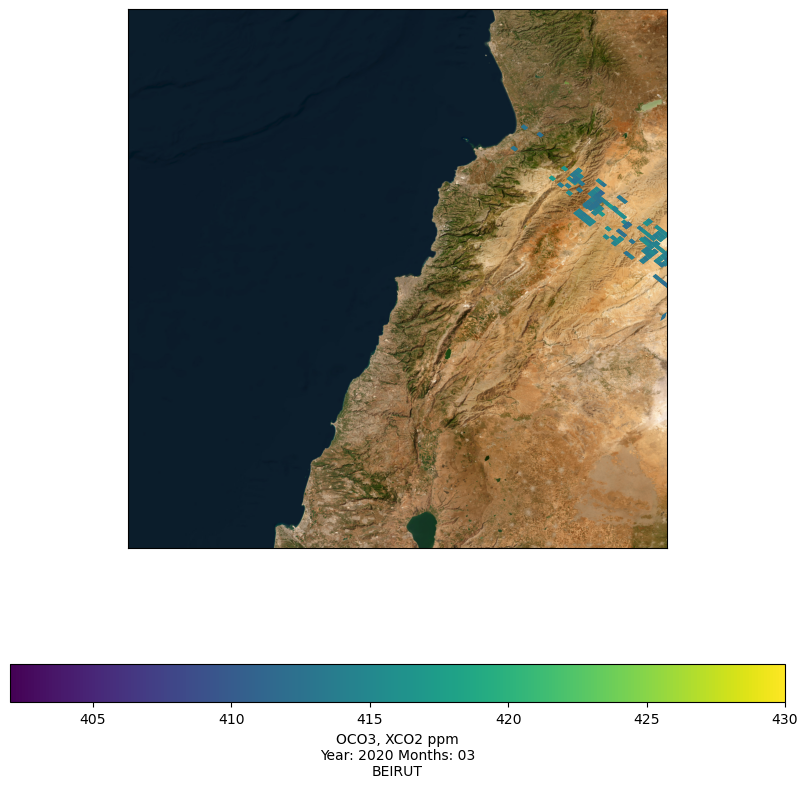

CPU times: total: 13.7 s
Wall time: 1min 19s


In [ ]:
%%time
## For an urban location, enter a city, i.e., "san francisco" (without quotes) then hit RETURN
location= input("Enter the location: ")
geo_loc= Nominatim(user_agent="locate", timeout=4)
info= geo_loc.geocode(str(location)).raw
## get the Bounding box information
loc_bbx= info["boundingbox"]
bbx_list= [float(i) for i in loc_bbx]
print('\n************************************\n')
print("Bbox information of :\n"+f'{location}')
bbx_list
#year= input("Enter the Year: ")
#month= input("Enter the Month: ")
# plot the location
plot_vertices(xco2_total, patches_total, bbx_list, location, year, month)

The Begining of the OCO-2 processing

In [3]:
# 1st step in OCO2
import os
import requests
import earthaccess
from earthaccess import Auth, Store, DataCollections, DataGranules
auth = Auth()
import datetime
import contextlib

from pathlib import Path

import pandas as pd
import glob

import numpy as np
import netCDF4
from netCDF4 import Dataset

import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

from scipy.interpolate import griddata

In [ ]:
!pip install earthaccess
!pip install Basemap
!pip install xesmf

In [ ]:
!pip install netCDF4

In [ ]:
# 2nd step in OCO2
%%time
auth = earthaccess.login(strategy="interactive", persist=True)

auth.login(strategy="netrc")
authvalid = auth.authenticated
print('Authenication Valid =',authvalid)

# The Store() class enables download or access to data and is instantiated with the user's auth instance.
store = Store(auth)

Authenication Valid = True
CPU times: total: 0 ns
Wall time: 738 ms


In [ ]:
# 3rdstep in OCO2
%%time
auth = earthaccess.login(strategy="interactive", persist=True)

auth.login(strategy="netrc")
authvalid = auth.authenticated
print('Authenication Valid =',authvalid)

# The Store() class enables download or access to data and is instantiated with the user's auth instance.
store = Store(auth)

Authenication Valid = True
CPU times: total: 46.9 ms
Wall time: 2.73 s


In [ ]:
# 4th step make sure to change folder or keep it
%%time
data_dir_check = os.path.isdir('./data_March_2020_2023')
print("Data directory exists: ",data_dir_check)

if data_dir_check != True:
    os.makedirs('./data_March_2020_2023')
    print("Created local data directory")

Data directory exists:  True
CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
# 5th step
def cmr_request(params):
    response = requests.get(url,
                        params=params,
                        headers={
                            'Accept': 'application/json',
                        }
                       )
    return response

In [ ]:
# 6th step
%%time
url = 'https://cmr.earthdata.nasa.gov/search/collections'

# Create our request to check that we can access CMR
response = cmr_request(url)

if response.status_code == 200:
    print(str(response.status_code) + ", CMR is accessible")
else:
    print(str(response.status_code) + ", CMR is not accessible, check for outages")

200, CMR is accessible
CPU times: total: 0 ns
Wall time: 311 ms


In [ ]:
# 7th step
%%time
# CMR API base url
cmrurl='https://cmr.earthdata.nasa.gov/search/' # define the base url of NASA's CMR API as the variable `cmrurl`
doi = '10.5067/8E4VLCK16O6Q'                   # OCO-2 dataset DOI

doisearch = cmrurl + 'collections.json?doi=' + doi
print(doisearch)

shortname = requests.get(doisearch).json()['feed']['entry'][0]['short_name']
longname = requests.get(doisearch).json()['feed']['entry'][0]['dataset_id']
version_id = requests.get(doisearch).json()['feed']['entry'][0]['version_id']
print('Short Name = '+shortname)
print('Long Name = '+longname)
print('Version Identifier = '+version_id)

https://cmr.earthdata.nasa.gov/search/collections.json?doi=10.5067/8E4VLCK16O6Q
Short Name = OCO2_L2_Lite_FP
Long Name = OCO-2 Level 2 bias-corrected XCO2 and other select fields from the full-physics retrieval aggregated as daily files, Retrospective processing V11.1r (OCO2_L2_Lite_FP) at GES DISC
Version Identifier = 11.1r
CPU times: total: 0 ns
Wall time: 985 ms


In [ ]:
# 8th step
# Define the quality flag variabe to utilize; in this case, we select 'xco2_quality_flag'.
qfvar = 'xco2_quality_flag'

# Define Measurement Variable Type; in this test case, we select 'xco2'.
measurement = 'xco2'


In [ ]:
# 9th step of OCO2
%%time
# Define the start and end date/time (YYYY-MM-DD).
start_time = '2020-03-01'
end_time = '2020-03-31'

# CMR Query for Data Granules
query = DataGranules().short_name(shortname).version(version_id).temporal(start_time, end_time)

# How many granules are located in the query?
print(f"Granule hits: {query.hits()}")

# Extract all available granule metadata from the query; invoking "-1" for all avaialble granules.
granules = query.get()

# Print sample list of granule metadata
granules[0:1]

Granule hits: 32
CPU times: total: 31.2 ms
Wall time: 21.7 s


[Collection: {'ShortName': 'OCO2_L2_Lite_FP', 'Version': '11.1r'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 180.0, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2020-02-29T00:00:00.000Z', 'EndingDateTime': '2020-03-01T00:00:00.000Z'}}
 Size(MB): 54.70662021636963
 Data: ['https://data.gesdisc.earthdata.nasa.gov/data/OCO2_DATA/OCO2_L2_Lite_FP.11.1r/2020/oco2_LtCO2_200229_B11100Ar_230603200059s.nc4']]

In [ ]:
the correct one

In [ ]:
# 9th step of OCO2
try:
    files = store.get(granules[:], local_path="./data_March_2020_2023")
except Exception as e:
    print(f"Error: {e}, we are probably not using this code in the Amazon cloud. Trying external links...")
    # There is hope, even if we are not in the Amazon cloud we can still get the data
    files = store.get(granules[:], access="external", local_path="./data_March_2020_2023")

 Getting 32 granules, approx download size: 1.69 GB


QUEUEING TASKS | :   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
# do not use this
%%time
time_series_a = []
version_str = 'B11100Ar'
file = ''

# Loop through the date range and plot Carbon Dioxide for each day
for current_date in pd.date_range(start_time, end_time):
    # Open the netCDF file
    file_date = current_date.strftime("%y%m%d")
    file_path_prefix = './data_March_2020_2023/oco2_LtCO2_'+file_date+'_'+version_str+'_'
    file_path = glob.glob(file_path_prefix+'*.nc4')
    print(file_path)
    if file_path != []:
        print('File date = ',file_date)
        #print('File path prefix = ',file_path_prefix)
        print('File path = ',file_path)

        file = file.join(file_path)

        # Open the netCDF file
        dataset = Dataset(f'{file}', 'r')
        print("reading data from =", file_date)

        # Read the data from your variables
        latitude = dataset.variables['latitude'][:]
        longitude = dataset.variables['longitude'][:]
        x_meas = dataset.variables[measurement][:]
        qf = dataset.variables[qfvar][:]

        dataset.close()

        # Filter the data for latitude and longitude
        latitude_max = 30.0
        latitude_min = -30.0
        longitude_max = 180.0
        longitude_min = -180.0

        # Determine the subset selection by latitude and longitude bounding box and quality flag (0 = good)
        selection_only = np.where(
            (latitude > latitude_min) & (latitude < latitude_max) &
            (longitude > longitude_min) &(longitude < longitude_max) & (qf == 0)
        )[0]

        # Apply the subset selection to data variables
        latitude = latitude[selection_only]
        longitude = longitude[selection_only]
        x_meas = x_meas[selection_only]

        pixel_size_deg = 5.0 # 5x5 degree grid resolution

        # Get the grid for the interpolated values
        grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]

        # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
        grid_x = griddata((latitude, longitude), x_meas, (grid_lat, grid_lon), method='nearest', rescale=True)

        time_series_a.append(grid_x)

time_series_a = np.array(time_series_a)
print(time_series_a.shape)
x_meas_month_mean_a = np.mean(time_series_a, axis=0)
print(x_meas_month_mean_a.shape)

This is the modified one

In [ ]:
# 10th step of OCO2
%%time
time_series_b = []
version_str = 'B11100Ar'
file = ''
xco2=[]
longitude_=[]
latitude_=[]
dates_=[]
df_oco2= pd.DataFrame()
# Loop through the date range and plot Carbon Dioxide for each day
#print(pd.date_range(start_time, end_time))
# Loop through the date range and plot Carbon Dioxide for each day
data = {'date': [], 'xco2': [], 'longitude': [], 'latitude': [], 'qf': []}
print(start_time, end_time)
for current_date in pd.date_range(start_time, end_time):
    # Open the netCDF file
    file_date = current_date.strftime("%y%m%d")
    file_path_prefix = './data_March_2020_2023/oco2_LtCO2_'+file_date+'_'+version_str+'_'
    file_path = glob.glob(file_path_prefix+'*.nc4')

    if file_path != []:
        print('File date = ',file_date)
        #print('File path prefix = ',file_path_prefix)
        print('File path = ',file_path)
        file = file.join(file_path)
        # Open the netCDF file
        dataset = Dataset(f'{file}', 'r')
        print("reading data from =", file_date)
        # Read the data from your variables
        dates__ = dataset.variables['date'][:]
        print(dates__.shape)
        latitude = dataset.variables['latitude'][:]
        print(latitude.shape)
        longitude = dataset.variables['longitude'][:]
        print(longitude.shape)
        x_meas = dataset.variables['xco2'][:]
        print(x_meas.shape)
        qf = dataset.variables['xco2_quality_flag'][:]
        print(qf.shape)
        dataset.close()
        # Filter the data for latitude and longitude
        latitude_max = 50.0
        latitude_min = -50.0
        longitude_max = 180.0
        longitude_min = -180.0
        '''latitude_max = 40.0
        latitude_min = -20.0
        longitude_max = 90.0
        longitude_min = -90.0'''

        # Determine the subset selection by latitude and longitude bounding box and quality flag (0 = good)
        selection_only = np.where(
            (latitude > latitude_min) & (latitude < latitude_max) &
            (longitude > longitude_min) &(longitude < longitude_max) & (qf == 0)
        )[0]
        if selection_only.size == 0:
            print(f"Warning: No data points found for {current_date}. Check your filtering criteria.")
            continue # Skip to the next iteration if no data is found
        # Apply the subset selection to data variables
        latitude = latitude[selection_only]
        print(latitude.shape)
        longitude = longitude[selection_only]
        print(longitude.shape)
        x_meas = x_meas[selection_only]
        print(x_meas.shape)
        dates__ = dates__[selection_only]
        print(dates__.shape)
        qf = qf[selection_only]
        print(qf.shape)
        '''xco2.append(x_meas)
        longitude_.append(longitude)
        latitude_.append(latitude)
        dates_.append(dates__)'''
        data['date'].extend(dates__)
        data['xco2'].extend(x_meas)
        data['longitude'].extend(longitude)
        data['latitude'].extend(latitude)
        data['qf'].extend(qf)
        pixel_size_deg =0.25 # 5x5 degree grid resolution
        # Get the grid for the interpolated values
        grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]

        # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
        grid_x = griddata((latitude, longitude), x_meas, (grid_lat, grid_lon), method='nearest', rescale=True)

        time_series_b.append(grid_x)

time_series_b = np.array(time_series_b)
print(time_series_b.shape)
'''df_oco2['date']=  list(np.array(np.concatenate(dates__)))
df_oco2['xco2']= np.array(np.concatenate(xco2)).ravel()
df_oco2['longitude']= list(np.array(np.concatenate(longitude_)))
df_oco2['latitude']= list(np.array(np.concatenate(latitude_)))
print('I am here')
df_oco2['date']= dates__'''
df_oco2= pd.DataFrame()
df_oco2['date']= data['date']
df_oco2['xco2']= data['xco2']
df_oco2['longitude']= data['longitude']
df_oco2['latitude']= data['latitude']
df_oco2['qf']= data['qf']
print('I am here')
'''df_oco2['xco2'] =xco2
df_oco2['longitude']= longitude_
df_oco2['latitude']= latitude_'''
x_meas_month_mean_a = np.mean(time_series_b, axis=0)
df_oco2.to_csv("./data_March_2020_2023/oco2_2020_March.csv")

In [ ]:
print(time_series_a.shape)

In [ ]:
#the above is modified to include per day series two parts the one below and below it

In [ ]:
# 11th step of OCO2
import datetime
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import pandas as pd
filename='./data_March_2020_2023/oco2_2020_March_withdate.csv'
df = pd.read_csv(filename)
#arr= np.zeros((len(df),3)).astype(float)
#arr1= np.zeros((len(df),1), dtype='datetime64[ns]')#np.zeros((len(df),1)).astype(datetime)
dtype1 = np.dtype([('date', 'datetime64[D]'),('time', 'datetime64[ns]'), ('XCO2', np.float64), ('Long', np.float64),('Lat', np.float64),('qlt', np.int64)])
arr2 = np.zeros((len(df),)).astype(dtype1)
for i in range(len(df)):
    date_ =  datetime.datetime.strptime(df.loc[i].iat[1][1:-6], "%Y    %m    %d    %H    %M    %S")
    print(date_)
    milliseconds = int(df.loc[i].iat[1][-4:-1])
    print(milliseconds)
    date_ = date_.replace(microsecond=milliseconds * 1000)
    print(date_)
    lon_point = df.loc[i].iat[3]
    print(lon_point)
    lat_point = df.loc[i].iat[4]
    print(type(lat_point))
    arr2[i]['date'] = date_ # Assign values to fields of the structured array
    arr2[i]['time'] = date_
    arr2[i]['XCO2'] = df.loc[i].iat[2]
    arr2[i]['Long'] =     lon_point # Access centroid coordinates correctly
    arr2[i]['Lat'] = lat_point #.iloc[0].y
    arr2[i]['qlt'] = df.loc[i].iat[5]
    #print(arr[i])
#print(arr1.shape)
#print(arr.shape)
#arr2 = np.hstack((arr1,arr))
DF = pd.DataFrame(arr2)
DF.to_csv("./data_March_2020_2023/oco2_2020_March.csv")
#polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.gpkg', driver="GPKG")
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

In [ ]:
#creating the grid based on the date

In [4]:
#step 12
import csv
with open("./data_March_2020_2023/OCO_2_formated_March2020.csv", 'r') as f:
    reader = csv.reader(f, delimiter=",")
    next(reader, None)
    data = np.array(list(reader))  # Keep data as a list of lists

with open("./data_March_2020_2023/OCO_3_formated_March2020.csv", 'r') as f1:
    reader = csv.reader(f1, delimiter=",")
    next(reader, None)
    data1 = np.array(list(reader))  # Keep data1 as a list of lists
data3 = np.concatenate((data, data1))
df = pd.DataFrame(data3) # Create a Pandas DataFrame from data3
df.to_csv("./data_March_2020_2023/OCO_2_OCO_3_joind_and_formated_March2020_.csv", index=False)
data=None
data1=None

In [ ]:
# if file exists you can use it
# @title
import csv
import numpy as np
with open("./OCO_2_OCO_3_joind_and_formated_july2023_.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=",")
    data3 =np.array(list(reader))

In [5]:
# step 13
dtype1 = np.dtype([('Id', np.int32),('date', 'datetime64[D]'),('time', 'datetime64[ns]'), ('XCO2', np.float32), ('Long', np.float32),('Lat', np.float32),('Qual', np.int32) ])
arr2 = np.zeros((len(data3),)).astype(dtype1)

In [6]:
# step 14
arr2['Id'] = data3[:, 0].astype(np.int32)
arr2['date'] = data3[:, 1]
arr2['time'] = data3[:, 2]
arr2['XCO2'] = data3[:, 3].astype(np.float32)
arr2['Long'] = data3[:, 4]
arr2['Lat'] = data3[:, 5]
arr2['Qual'] = data3[:, 6].astype(np.int32)

In [7]:
#step15
df = pd.DataFrame(arr2['time'], columns=['datetime_column'])

# Extract the time
df['date_only'] = df['datetime_column'].dt.date
df['time_only'] = df['datetime_column'].dt.time

print(df['date_only'])

df['seconds'] = pd.to_timedelta(df['time_only'].astype(str)).dt.total_seconds()

print(df['seconds'])


0          2020-03-01
1          2020-03-01
2          2020-03-01
3          2020-03-01
4          2020-03-01
              ...    
6217517    2020-03-31
6217518    2020-03-31
6217519    2020-03-31
6217520    2020-03-31
6217521    2020-03-31
Name: date_only, Length: 6217522, dtype: object
0           1819.3
1           1819.3
2           1819.7
3           1819.7
4           1819.7
            ...   
6217517    86309.7
6217518    86309.7
6217519    86309.7
6217520    86310.0
6217521    86310.0
Name: seconds, Length: 6217522, dtype: float64


In [8]:
#step 16
dtype2 = np.dtype([('seconds', np.int32), ('XCO2', np.float32), ('Long', np.float32),('Lat', np.float32) ])
arr4 = np.zeros((len(data3),)).astype(dtype2)
arr4['seconds'] = df['seconds']
arr4['Lat'] = arr2['Lat']
arr4['Long'] = arr2['Long']
arr4['XCO2'] = arr2['XCO2']
print(arr4['seconds'])
print(arr4['Lat'])
print(arr4['Long'])
print(arr4['XCO2']  )

[ 1819  1819  1819 ... 86309 86310 86310]
[-45.14657   -45.14593   -45.128418  ...  -3.7044249  -3.7196345
  -3.708863 ]
[-158.09651 -158.1176  -158.10178 ...  177.99146  178.03603  178.02513]
[409.3857  409.26672 409.14136 ... 410.7398  410.68533 410.71094]


In [ ]:
time_series_d = []
version_str = 'B11100Ar'
file = ''
latitude_max = 90.0
latitude_min = -90.0
longitude_max = 180.0
longitude_min = -180.0
alldates= np.unique(arr2[:]['date'])
print(len(alldates))
for j in range(len(alldates)):
  arr3=arr2[arr2[:]['date'] == np.datetime64( (alldates[j]))]
 #print(len(arr3))
  if len(arr3) > 0:
    X= np.zeros((len(arr3),4)).astype(np.float32)
    # Read the data from your variables
    # Slice X based on the current indices of arr3 in arr2
    #indices = np.where(arr2[:]['date'] == np.datetime64((alldates[j])))[0]
    X[:,0] = arr3[:]['Lat']
    X[:,1] =arr3[:]['Long']
    X[:,2] =arr3[:]['XCO2']
    df1 = pd.DataFrame(arr3['time'], columns=['datetime_column'])

    # Extract the time
    df1['date_only'] = df1['datetime_column'].dt.date
    df1['time_only'] = df1['datetime_column'].dt.time

    df1['seconds'] = pd.to_timedelta(df1['time_only'].astype(str)).dt.total_seconds()
    X[:,3] = df1['seconds']
    print(X)
  # Filter the data for latitude and longitude
  # Determine the subset selection by latitude and longitude bounding box and quality flag (0 = good)
    selection_only = np.where(
      (X[:,0] > latitude_min) & (X[:,0] < latitude_max) &
      (X[:,1] > longitude_min) &(X[:,1] < longitude_max))[0]
    print(len(selection_only))
    # Apply the subset selection to data variables
    X1= np.zeros((len(selection_only),4)).astype(np.float32)
    #Y1= np.zeros((len(selection_only))).astype(np.float32)
    X1[:,:] = X[selection_only,:]

  # Apply the subset selection to data variables
    pixel_size_deg =0.1 # 5x5 degree grid resolution
  # Get the grid for the interpolated values
    grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]

  # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
    grid_x = griddata((X1[:,0], X1[:,1]), X1[:,2], (grid_lat, grid_lon), method='linear', rescale=True)#, fill_value=0, rescale=True)
    time_series_d.append(grid_x)
lat = np.linspace(-90, 90, grid_x.shape[0])  # 2D latitude array
lon = np.linspace(-180, 180, grid_x.shape[1])  # 2D longitude array
time = np.arange(0, 31)  # 1D time array (e.g., periods of the july month)
filename="co2july2023.nc"
time_series_d= np.array(time_series_d)
create_netcdf2(time,lat,lon, time_series_d, filename)
#print(time_series_d.shape)
x_meas_month_mean_aa = np.mean(time_series_d, axis=0)
print(x_meas_month_mean_aa.shape)

31
[[ 4.2544163e+01 -1.6545332e+02  4.1954260e+02  1.8299999e+01]
 [ 4.2534615e+01 -1.6544719e+02  4.2103516e+02  1.8299999e+01]
 [ 4.2562492e+01 -1.6546017e+02  4.2116174e+02  1.8700001e+01]
 ...
 [-1.8192379e+01  1.7770790e+02  4.2036600e+02  8.4662297e+04]
 [-1.8184391e+01  1.7772151e+02  4.2249283e+02  8.4662297e+04]
 [-1.8217442e+01  1.7778894e+02  4.2102118e+02  8.4663297e+04]]
145964
[[-3.75891724e+01 -1.57107956e+02  4.15286041e+02  1.16230005e+03]
 [-3.75357666e+01 -1.57120087e+02  4.14746887e+02  1.16330005e+03]
 [-3.75130501e+01 -1.57079819e+02  4.15025818e+02  1.16400000e+03]
 ...
 [ 4.25759468e+01  1.04370560e+02  4.21723389e+02  8.60780000e+04]
 [ 4.25871620e+01  1.04384476e+02  4.21334900e+02  8.60780000e+04]
 [ 4.25531731e+01  1.04379913e+02  4.22390167e+02  8.60782969e+04]]
186282
[[-3.2467289e+01 -1.6917386e+02  4.1633365e+02  3.8550000e+03]
 [-3.0866371e+01 -1.6944789e+02  4.1557037e+02  3.8853000e+03]
 [-3.0766005e+01 -1.6950862e+02  4.1576651e+02  3.8870000e+03]
 .

In [ ]:
import numpy as np
from netCDF4 import Dataset

# Sample data

def create_netcdf2(time,lat,lon,xco2,filename):
  # Create a new NetCDF file
  try:
    # Create a new NetCDF file
    ncfile = Dataset(filename, 'w', format='NETCDF4')

    # Create dimensions
    ncfile.createDimension('time', len(time))
    ncfile.createDimension('lat', len(lat))
    ncfile.createDimension('lon', len(lon))

    # Create variables
    times = ncfile.createVariable('time', np.float64, ('time',))
    latitudes = ncfile.createVariable('lat', np.float32, ('lat',))
    longitudes = ncfile.createVariable('lon', np.float32, ('lon',))
    xco2_var = ncfile.createVariable('xco2', np.float32, ('time', 'lat', 'lon',))

    # Add attributes
    times.units = 'days since 2000-01-01'
    times.long_name = 'Time'
    latitudes.units = 'degrees north'
    latitudes.long_name = 'Latitude'
    longitudes.units = 'degrees east'
    longitudes.long_name = 'Longitude'
    xco2_var.units = 'ppm'
    xco2_var.long_name = 'xco2'

    # Write data to variables
    times[:] = time
    latitudes[:] = lat
    longitudes[:] = lon
    xco2_var[:, :, :] = xco2

    # Close the file
    #ncfile.close()
  except Exception as e:
    print(f"An error occurred: {e}")
  finally:
    ncfile.close()
    print("Dataset closed.")

In [ ]:
arr2['Id'] = data1[:, 0].astype(np.int32)
arr2['date'] = data1[:, 1]
arr2['time'] = data1[:, 2]
arr2['XCO2'] = data1[:, 3]
arr2['Long'] = data1[:, 4]
arr2['Lat'] = data1[:, 5]
arr2['Qual'] = data1[:, 6].astype(np.int32)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def pointIntgrid(points,grid_values, grid_size):
  lat_min = np.min(points[:,0])
  lat_max = np.max(points[:,0])
  lon_min = np.min(points[:,1])
  lon_max = np.max(points[:,1])
  newpoints= np.zeros((len(points),3)).astype(np.float32)
  for i in range (len(points)):
    point = points[i,:]
    lat_idx = int((point[0] - lat_min) // grid_size)
    lon_idx = int((point[1] - lon_min) // grid_size)
    cell_value = grid_values[lat_idx, lon_idx]
    newpoints[i,0] = point[0]
    newpoints[i,1] = point[1]
    newpoints[i,2] = cell_value
    #print(f"Point {point} is in grid cell ({lat_idx}, {lon_idx}) with value {cell_value}")

  # Plot the second array of points
  '''plt.scatter(points[:, 1], points[:, 0], c=points[:,2], cmap='Reds', label='original', edgecolor='black')
  plt.scatter(newpoints[:, 1], newpoints[:, 0], c=newpoints[:,2], cmap='Blues', label='Griddata interp', edgecolor='black')

  # Add colorbars
  plt.colorbar(label='Values of original data', orientation='vertical', pad=0.01, aspect=10)
  plt.colorbar(label='Values of interpolation by grid data', orientation='vertical', pad=0.01, aspect=10)

  # Add labels and legend
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.title('Plotting Values of original plus interpolated')
  plt.legend()

  # Show the plot
  plt.show()'''
  print(len(points))
  print(np.count_nonzero(np.isnan(points[:, 2])))
  original_values = points[:, 2]
  print(np.count_nonzero(np.isnan(newpoints[:, 2])))
  predicted_values = newpoints[:, 2]
  mask = ~np.isnan(predicted_values)
  filtered_original = original_values[mask]
  filtered_predicted = predicted_values[mask]

  # Calculate R-squared value
  r2 = r2_score(filtered_original, filtered_predicted)
  print(f"R-squared value: {r2}")
  # Plot the original data points
  ''' plt.scatter(points[:, 1], points[:, 0], c=points[:,2], cmap='Blues', label='Original', edgecolor='black')

  # Plot the predicted data points
  plt.scatter(newpoints[:, 1], newpoints[:, 0], c=newpoints[:,2], cmap='Reds', label='Predicted', edgecolor='black')

  # Add colorbars
  plt.colorbar(label='Values (Original)', orientation='vertical', pad=0.01, aspect=10)
  plt.colorbar(label='Values (Interpolated by DINEOF)', orientation='vertical', pad=0.01, aspect=10)

  # Add labels and legend
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.title('Original vs Predicted Data with R-squared')
  plt.legend()

  # Show the plot
  plt.show()'''
  plt.scatter(original_values, predicted_values, color='blue', s=10,label='Original vs RBF interpolation')

  # Plot a line y=x for reference
  plt.plot([min(original_values), max(original_values)], [min(original_values), max(original_values)], color='red', linestyle='--', label='y=x')

  # Add labels and legend
  plt.xlabel('Original Values')
  plt.ylabel('RBF interpolated Values')
  plt.title('Original vs RBF interpolated Values with R-squared')
  plt.legend()

  # Show the plot
  plt.show()


In [ ]:
%%time

from scipy.interpolate import RBFInterpolator, Rbf, CloughTocher2DInterpolator,LinearNDInterpolator,RegularGridInterpolator,NearestNDInterpolator,make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap
import datetime
from timeit import default_timer as timer
start = timer()
latitude_max = 50
latitude_min = 10.0
longitude_max = 90
longitude_min =0.0
a = 0.5
# Get the colormap colors, multiply them with the factor "a", and create new colormap
my_cmap = plt.cm.jet(np.arange(plt.cm.jet.N))
my_cmap[:,0:3] *= a
my_cmap = ListedColormap(my_cmap)
alldates= np.unique(arr2[:]['date'])
#print(len(alldates))
for j in range(len(alldates)):
  aspect_ratio = (longitude_max - longitude_min) / (latitude_max - latitude_min)
  w = 3600; h = w / aspect_ratio
  dpi = 300;
  plt.figure(figsize=(w / dpi, h / dpi))
  arr3=arr2[arr2[:]['date'] == np.datetime64( (alldates[j]))]
 #print(len(arr3))
  if len(arr3) > 0:
      X= np.zeros((len(arr3),3)).astype(np.float32)
      Y= np.zeros((len(arr3))).astype(np.float32)
      qf= np.zeros((len(arr3))).astype(np.int32)
      # Read the data from your variables
      # Slice X based on the current indices of arr3 in arr2
      #indices = np.where(arr2[:]['date'] == np.datetime64((alldates[j])))[0]
      X[:,0] = arr3[:]['Lat']
      X[:,1] =arr3[:]['Long']
      X[:,2] =arr3[:]['XCO2']
      #X[indices,0] =arr3[:]['date'] #np.array([dt.item().timetuple().tm_yday for dt in arr2[indices]['date']])  # Use the same indices for arr2
      #X[indices,2] =arr3[:]['XCO2']
      #Y[:] = arr3[:]['XCO2']
      qf[:] = arr3[:]['Qual']
      print(X.shape)
      #print(Y.shape)
      selection_only = np.where(
      (X[:,0] > latitude_min) & (X[:,0] < latitude_max) &
      (X[:,1] > longitude_min) &(X[:,1] < longitude_max) & (qf[:] == 0))[0]
      print(len(selection_only))
      # Apply the subset selection to data variables
      X1= np.zeros((len(selection_only),3)).astype(np.float32)
      #Y1= np.zeros((len(selection_only))).astype(np.float32)
      X1[:,:] = X[selection_only,:]
      points= np.zeros((len(selection_only),3)).astype(np.float32)
      points[:,0] = X[selection_only,0]
      points[:,1] = X[selection_only,1]
      points[:,2] = X[selection_only,2]

      #Y1=Y[selection_only]
      #print("X1 and Y1 length:", len(X1), " ",len(Y1) )
      #print(X1)
      #print(Y1)
  pixel_size_deg =0.1 # 5x5 degree grid resolution
  # Get the grid for the interpolated values
  # Get the grid for the interpolated values
  # Adjust the grid dimensions to match the expected output of the interpolation
  num_lat_points = int(np.round((latitude_max - latitude_min) / pixel_size_deg,0)) + 1
  num_lon_points = int(np.round((longitude_max - longitude_min) / pixel_size_deg))+ 1
  print(num_lat_points)
  print(num_lon_points)
  xgrid = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg,
                   longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]
  xflat = xgrid.reshape(2, -1).T
  X2=X1[np.unique(X1[:,:2],axis=0,return_index=True)[1]]
  print(len(X2))
  yflat = RBFInterpolator(X2[:,0:2], X2[:,2],kernel='linear')(xflat)#,neighbors=4, smoothing=0.0, kernel='cubic')(xflat)
  #yflat = LinearNDInterpolator(X,Y,fill_value=0)(xflat)#,neighbors=None, smoothing=0.0, kernel='linear')(xflat)
  # Reshape the interpolated data to match the xgrid dimensions
  #yflat = yflat.reshape(num_lat_points, num_lon_points)
  print("this is yflat")
  print(yflat.shape)
  ygrid = yflat.reshape(num_lat_points, num_lon_points)
  pointIntgrid(points,ygrid,pixel_size_deg)
  print("this is ygrid")
  '''print(ygrid.shape)
  print(np.max(ygrid))
  print(np.min(ygrid))'''
  '''fig, ax = plt.subplots()
  # Use the full ygrid for pcolormesh
  ax.pcolormesh(*xgrid, ygrid, vmin=-380, vmax=430, shading='gouraud')
  #p = ax.scatter(*X.T, c=Y, s=50, ec='k', vmin=-380, vmax=430)
  fig.colorbar(p)
  plt.show()'''
  m = Basemap(projection='cyl', resolution='l',
              llcrnrlat=latitude_min, urcrnrlat=latitude_max,  # set latitude limits as previously defined
              llcrnrlon=longitude_min, urcrnrlon=longitude_max)  # set longitude limits as previously defined

  m.drawmapboundary(fill_color='black')
  m.drawcoastlines(linewidth=0.3, color='white')
  m.drawcountries(linewidth=0.2, color='white')

  # Draw parallels (latitude lines) and meridians (longitude lines)
  parallels = np.arange(latitude_min, latitude_max+1, 20.)
  m.drawparallels(parallels, labels=[True,False,False,False], linewidth=0.3)

  meridians = np.arange(longitude_min, longitude_max+1, 30.)
  m.drawmeridians(meridians, labels=[False,False,False,True], linewidth=0.3)
  '''mask = Y[:15000] > 0
  vmax1=np.max(Y[:15000][mask] )  # Apply the mask to the slice
  vmin1= np.min(Y[:15000][mask])'''
  vmax1=np.max(ygrid)
  vmin1= np.min(ygrid)
  print(vmax1)
  print(vmin1)
  '''print(np.max(X[:10000,0]))
  print(np.min(X[:10000,0]))
  print(np.max(X[:10000,1]))
  print(np.min(X[:10000,1]))
  print(np.max(Y[:10000]))
  print(np.min(Y[:10000]))'''
  cmap = plt.colormaps['YlGnBu']
  sc = m.pcolormesh(xgrid[1,:,:], xgrid[0,:,:],ygrid[:-1,:-1], latlon=True,cmap= my_cmap,vmin=vmin1, vmax=vmax1,shading='flat')#shading='gouraud')#grid_lon, grid_lat, time_series_d[i,:-1,:-1], latlon=True, cmap='jet', alpha=0.9,vmin=vmin1, vmax=vmax1, shading='flat')
  # Add a colorbar
  m.scatter(X2[:,1],X2[:,0],c =X2[:,2],s = 5,cmap = 'Greys')
  cbar = m.colorbar(sc, location='bottom', pad="20%")

  #cbar.set_ticks([vmin1-10,vmin1, vmax1,vmax1+10])
  cbar.set_label('OCO-2-3 Column-averaged CO2 from the surface to Top of Atmosphere (TOA), ppm')

  # set plot title

  '''n= i*15
  from_date = alldates[n]
  to_date = alldates[n+14]'''
  current_date= alldates[j]
  #title_date = current_date.strftime("%b-%Y")
  plt.title(f'CO-2 Column-averaged CO2 daily Average by RBF interpolator'+' for '+ str(current_date))
  #plt.title(f'CO-2 Column-averaged CO2 15 days Average')#+' from '+ str(from_date) + " to " + str(to_date))
  #plt.title(f'CO-2 Column-averaged CO2 5 days Average
  #\nMin: {title_min:.01f}, Max: {title_max:.01f} ppmv')

  # Save figure to PNG file
  plt.savefig(f"./data_image_rbfjuly2023/"+ str(current_date)+'.png', dpi=dpi, bbox_inches='tight')
  #plt.savefig(f"/content/drive/MyDrive/OCO2-OCO3/"+ str(current_date)+  '.png', dpi=dpi, bbox_inches='tight')# str(from_date) + "_to_" + str(to_date)+'.png', dpi=dpi, bbox_inches='tight')
  plt.show()
  plt.close()
  X=None
  Y=None
  xgrid=None
  xflat=None
  yflat=None
  ygrid=None
print("without GPU:", timer()-start)

In [ ]:
#testing multiple days

In [ ]:
%%time
import netCDF4 as nc
time_series_d = []
version_str = 'B11100Ar'
file = ''
latitude_max = 50.0
latitude_min = 10.0
longitude_max = 90.0
longitude_min = 0.0
P=3
o=0
file_path = "G:/My Drive/OCO2-OCO3/output/co2july2023_3days_out.nc"  # created by
dataset = nc.Dataset(file_path, 'r')
data = dataset.variables['xco2'][:]  # Replace 'data_variable' with the actual variable name
alldates= np.unique(arr2[:]['date'])
print(len(alldates))
for j in range(0,len(alldates)-1,P):
  arr3=[]
  for i in range(j,j+P,1):
   arr3.extend(arr2[arr2[:]['date'] == np.datetime64( (alldates[i]))])
  print(len(arr3))
  # Read the data from your variables
  latitude = np.array([row['Lat'] for row in arr3]) # Extract 'Lat' values into a numpy array
  longitude = np.array([row['Long'] for row in arr3]) # Extract 'Long' values into a numpy array
  x_meas = np.array([row['XCO2'] for row in arr3]) # Extract 'XCO2' values into a numpy array
  qf = np.array([row['Qual'] for row in arr3]) # Extract 'Qual' values into a numpy array
  # Filter the data for latitude and longitude
  # Determine the subset selection by latitude and longitude bounding box and quality flag (0 = good)
  selection_only = np.where(
      (latitude > latitude_min) & (latitude < latitude_max) &
      (longitude > longitude_min) &(longitude < longitude_max) & (qf == 0)
  )[0]

  # Apply the subset selection to data variables
  latitude = latitude[selection_only]
  longitude = longitude[selection_only]
  x_meas = x_meas[selection_only]
  pixel_size_deg =0.1 # 5x5 degree grid resolution
  points= np.zeros((len(selection_only),3)).astype(np.float32)
  print("length of points", len(points))
  points[:,0] = latitude

  points[:,1] = longitude
  points[:,2] = x_meas

  # Get the grid for the interpolated values
  grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]

  # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
  grid_x = griddata((latitude, longitude), x_meas, (grid_lat, grid_lon), method='linear', rescale=True)#, fill_value=0, rescale=True)
  #pointIntgrid(points,grid_x,pixel_size_deg)
  pointIntgrid(points,data[o,:,:],pixel_size_deg)
  o=o+1
  time_series_d.append(grid_x)
lat = np.linspace(10, 50, grid_x.shape[0])  # 2D latitude array
lon = np.linspace(0, 90, grid_x.shape[1])  # 2D longitude array
time = np.arange(0, 10)  # 1D time array (e.g., periods of the july month)
print(time.shape)
filename="co2july2023_3days.nc"
time_series_d= np.array(time_series_d)
print(time_series_d.shape)
create_netcdf1(time,lat,lon, time_series_d, filename)
x_meas_month_mean_aa = np.mean(time_series_d, axis=0)
print(x_meas_month_mean_aa.shape)

In [ ]:
%%time
import pandas as pd
time_series_b = []
version_str = 'B11100Ar'
file = ''
x_meas1 = []
latitude_max = 40
latitude_min = 20.0
longitude_max = 45
longitude_min =15.0
alldates= np.unique(arr2[:]['date'])
#file_path = "G:/My Drive/OCO2-OCO3/output/co2july2023all3.nc"  # created by
#dataset = nc.Dataset(file_path, 'r')
#data = dataset.variables['xco2'][:]  # Replace 'data_variable' with the actual variable name
#dataset.close()
for j in range(len(alldates)):
  arr3=arr2[arr2[:]['date'] == np.datetime64( (alldates[j]))]
  # Read the data from your variables
  time = arr3[:]['time']
  latitude = arr3[:]['Lat']
  longitude =arr3[:]['Long']
  x_meas = arr3[:]['XCO2']
  qf = arr3[:]['Qual']
  #print(latitude)
  #print(longitude)
  #print(x_meas)
  #print(qf)
  # Filter the data for latitude and longitude
  # Determine the subset selection by latitude and longitude bounding box and quality flag (0 = good)
  selection_only = np.where(
      (latitude > latitude_min) & (latitude < latitude_max) &
      (longitude > longitude_min) &(longitude < longitude_max) & (qf == 0)
  )[0]

  # Apply the subset selection to data variables
  points= np.zeros((len(selection_only),3)).astype(np.float32)
  points[:,0] = latitude[selection_only]
  points[:,1] = longitude[selection_only]
  points[:,2] = x_meas[selection_only]
  latitude = latitude[selection_only]
  longitude = longitude[selection_only]
  time = time[selection_only]
  x_meas = x_meas[selection_only]
  #filename="co2__"+str(alldates[j])+".nc"
  #create_netcdf(array1,filename)
  pixel_size_deg =0.1 # 5x5 degree grid resolution
  # Get the grid for the interpolated values
  grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]
  # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
  grid_x = griddata((latitude, longitude), x_meas, (grid_lat, grid_lon), method='nearest')#, fill_value=0, rescale=True)
  #print(len(data[j,:,:]))
  '''mask = data[j,:,:] > 200
  vmax1=np.max(data[j,:,:][mask] )  # Apply the mask to the slice
  vmin1= np.min(data[j,:,:][mask])
  avrg = (vmax1+vmin1)/2
  print("vmax, vmin, average", vmax1, vmin1, avrg)
  data[j, data[j]< 200] = avrg'''
  #pointIntgrid(points,data[j,:,:],pixel_size_deg)#data[j,:,:],pixel_size_deg)
  #print(grid_x.shape)
  #print(np.count_nonzero(np.isnan(grid_x)))
  '''if np.count_nonzero(np.isnan(grid_x)) >0:
    #print("iam her")
    #print(grid_x)
    #df = pd.DataFrame(grid_x)
    if df.dropna().size >= 3:  # At least 3 points needed for order=2
      df.interpolate(method='polynomial', order=2, inplace=True) # Interpolate if enough data
    else:
      df.interpolate(method='linear', inplace=True) # Fallback to linear interpolation
    #df.interpolate(method='polynomial', order=2, inplace=True)
    #df.interpolate(method='linear', inplace=True)
    #grid_x1 = df.to_numpy()
   #print("after interpolate")
    #if(np.count_nonzero(np.isnan(grid_x1))< np.count_nonzero(np.isnan(grid_x))):
     #print("iam here")
    #print(np.count_nonzero(np.isnan(grid_x1)))
    #time_series_b.append(grid_x1)
  else:'''
  #print(grid_x)
  time_series_b.append(grid_x)
time_series_b = np.array(time_series_b)
print(time_series_b.shape)
'''lat = np.linspace(50, 50, grid_x.shape[0])  # 2D latitude array
lon = np.linspace(-180, 180, grid_x.shape[1])  # 2D longitude array
time = np.arange(0, 31)  # 1D time array (e.g., days of the july month)
print(time.shape)
filename="co2july2023_31.nc"
create_netcdf1(time,lat,lon, time_series_b[0,:,:], filename)
# Create a mask: 1 for valid data, 0 for missing data
mask = ~np.isnan(time_series_b[0,:,:])
filename2 = "maskfile_0.nc"
create_netcdf(time,lat,lon,mask, filename2)
print(mask.shape)'''
x_meas_month_mean_a = np.mean(time_series_b, axis=0)
#print(x_meas_month_mean_a.shape)

In [ ]:
DINEOF results display

(10, 401, 901)
31
this is mask (401, 901)
427.33483186342437
407.5330442447015


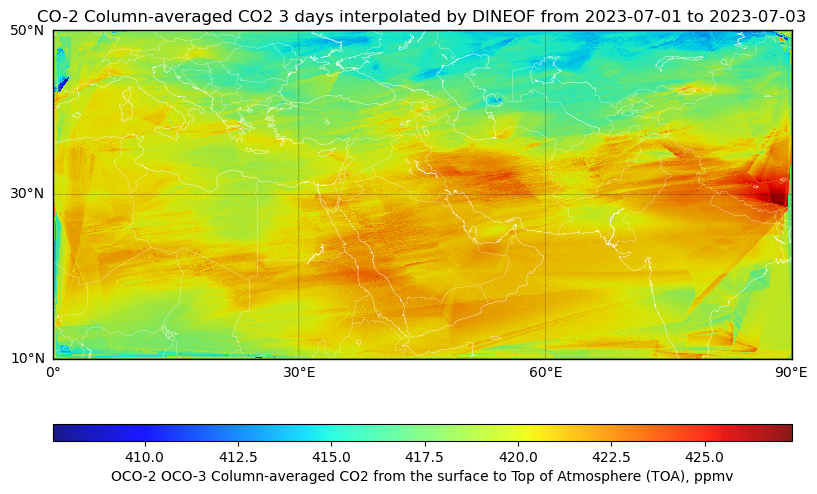

this is mask (401, 901)
427.0276104005195
408.0644519544247


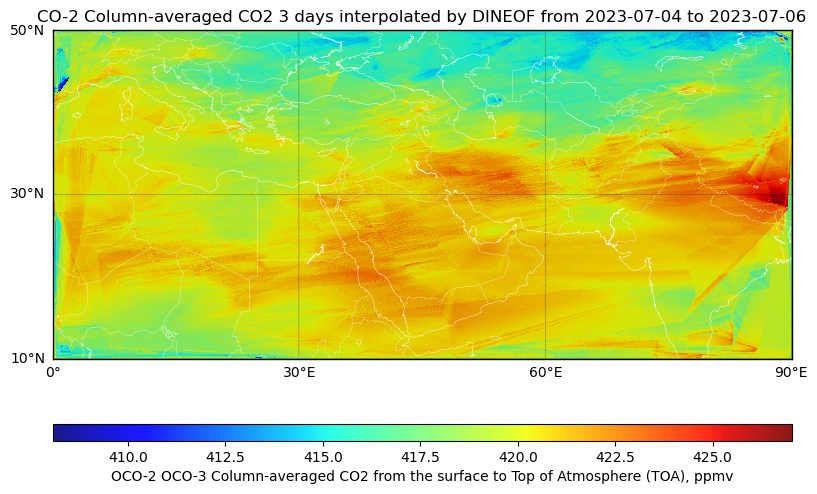

this is mask (401, 901)
424.76894950752296
410.7976055285762


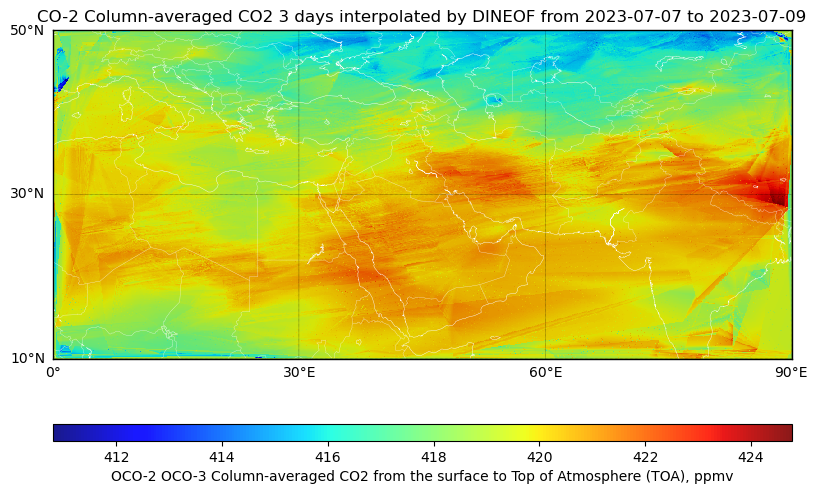

this is mask (401, 901)
421.9881334564986
412.7756835086193


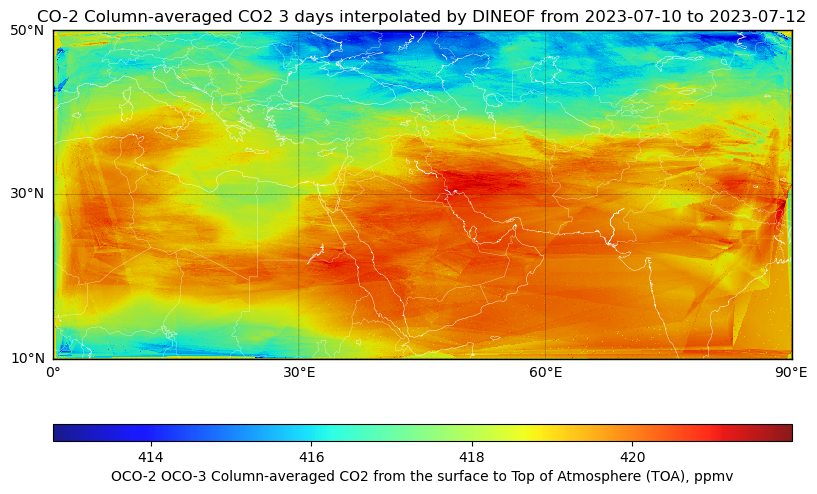

this is mask (401, 901)
420.89835957636205
414.34554041376094


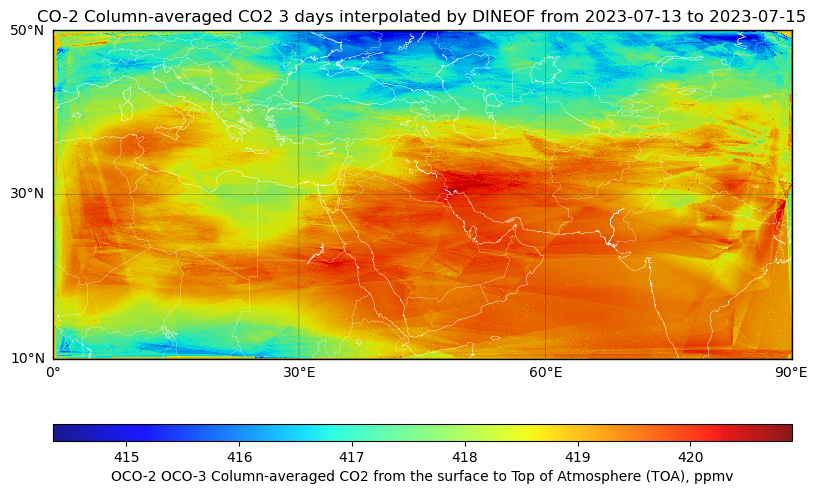

this is mask (401, 901)
422.9083266110536
412.89439313363937


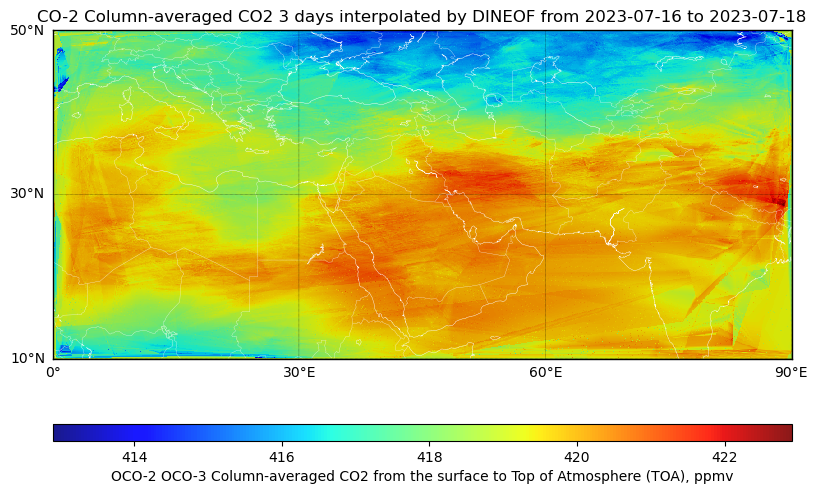

this is mask (401, 901)
421.8105279609583
412.6070113943673


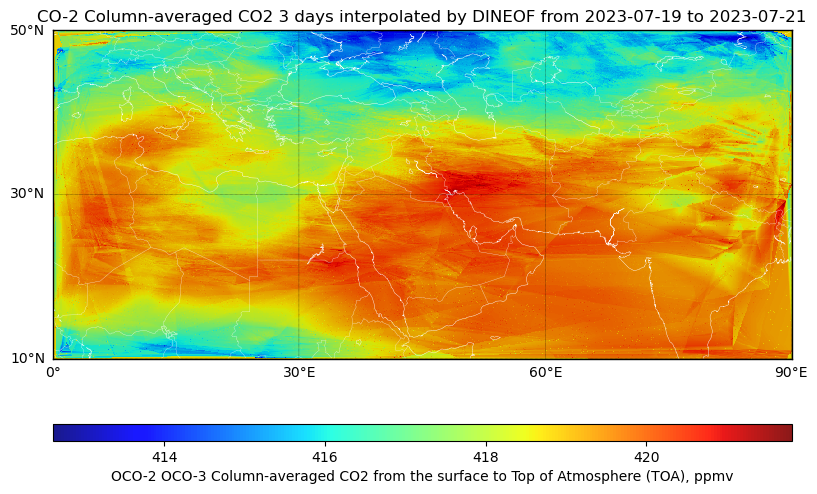

this is mask (401, 901)
422.5364882877969
411.6864804725552


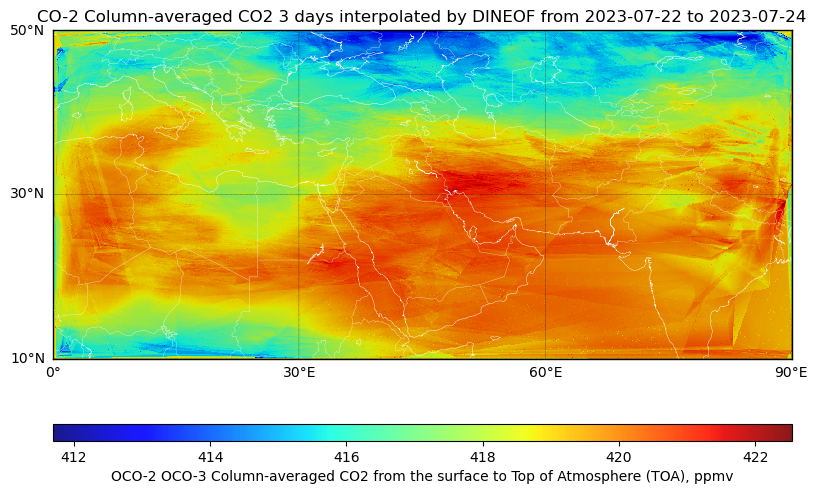

this is mask (401, 901)
422.06302097183806
412.4120503288143


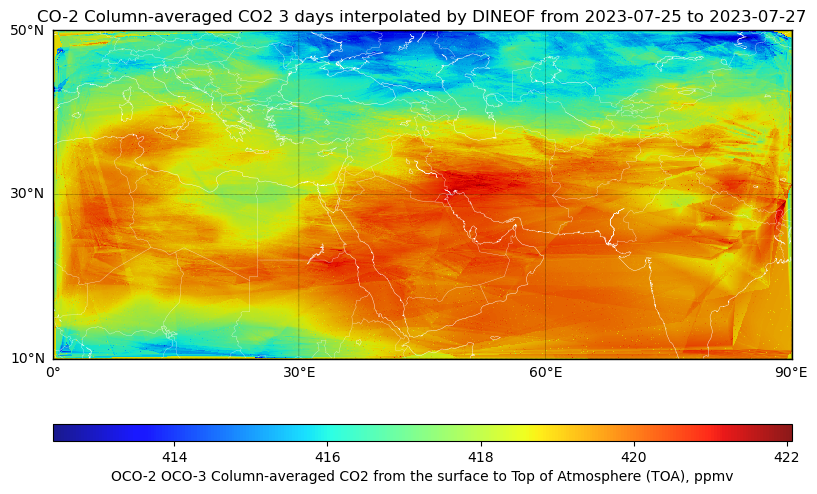

this is mask (401, 901)
421.76894053314874
411.3906957052975


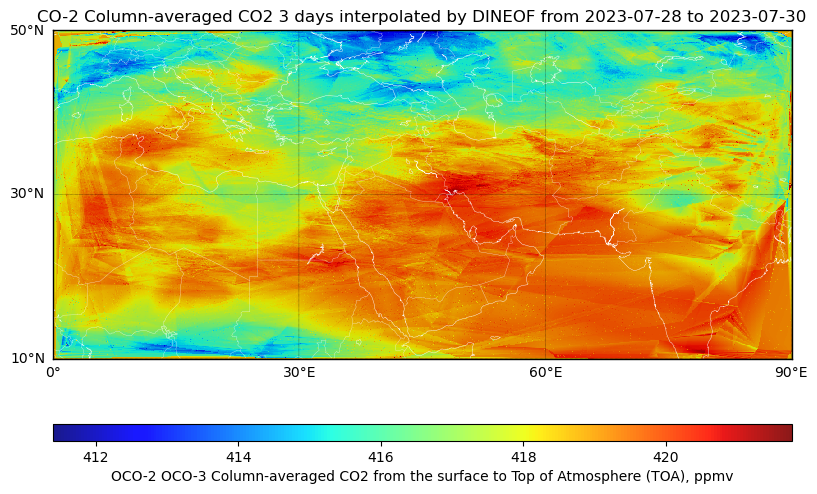

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
latitude_max = 50
latitude_min = 10.0
longitude_max = 90
longitude_min =0.0
# Open the NetCDF file
file_path = "G:/My Drive/OCO2-OCO3/output/co2july2023_3days_out.nc"  # created by
dataset = nc.Dataset(file_path, 'r')
data = dataset.variables['xco2'][:]  # Replace 'data_variable' with the actual variable name
print(data.shape)
dataset.close()
# Replace 'data_variable' with the actual variable name
alldates= np.unique(arr2[:]['date'])
print(len(alldates))
P=3
o=0
for j in range(0,len(alldates)-1,P):
  aspect_ratio = (longitude_max - longitude_min) / (latitude_max - latitude_min)
  w = 3600; h = w / aspect_ratio
  # Specify figure size (in inches)
  dpi = 300;
  plt.figure(figsize=(w / dpi, h / dpi))
  # Extract variables
  m = Basemap(projection='cyl', resolution='l',
              llcrnrlat=latitude_min, urcrnrlat=latitude_max,  # set latitude limits as previously defined
              llcrnrlon=longitude_min, urcrnrlon=longitude_max)  # set longitude limits as previously defined

  m.drawmapboundary(fill_color='black')
  m.drawcoastlines(linewidth=0.3, color='white')
  m.drawcountries(linewidth=0.2, color='white')

  # Draw parallels (latitude lines) and meridians (longitude lines)
  parallels = np.arange(latitude_min, latitude_max+1, 20.)
  m.drawparallels(parallels, labels=[True,False,False,False], linewidth=0.3)

  meridians = np.arange(longitude_min, longitude_max+1, 30.)
  m.drawmeridians(meridians, labels=[False,False,False,True], linewidth=0.3)

  pixel_size_deg =0.1 # 5 degree resolution

  # Get the grid for the interpolated values
  grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]
  mask = data[o,:,:] > 200
  print("this is mask", mask.shape)
  vmax1=np.max(data[o,:,:][mask] )  # Apply the mask to the slice
  vmin1= np.min(data[o,:,:][mask])  # Apply the mask to the slice
  print(vmax1)
  print(vmin1)
  sc = m.pcolormesh(grid_lon, grid_lat, data[o,:-1,:-1], latlon=True, cmap='jet', alpha=0.9, vmin=vmin1, vmax=vmax1, shading='auto')
  '''mask = time_series_b[j,:,:] > 0
  vmax1=np.max(time_series_b[j,:,:][mask] )  # Apply the mask to the slice
  vmin1= np.min(time_series_b[j,:,:][mask])  # Apply the mask to the slice
  print(vmax1)
  print(vmin1)
  sc = m.pcolormesh(grid_lon, grid_lat, time_series_b[j,:-1,:-1], latlon=True, cmap='jet', alpha=0.9, vmin=vmin1, vmax=vmax1, shading='auto')'''
  #m.scatter(longitude,latitude,c =x_meas,s = 5,cmap = 'Greys')
  # Add a colorbar
  cbar = m.colorbar(sc, location='bottom', pad="20%")
  cbar.set_label('OCO-2 OCO-3 Column-averaged CO2 from the surface to Top of Atmosphere (TOA), ppmv')

  # set plot title
  n= j
  from_date = alldates[n]
  to_date = alldates[n+2]
  #current_date= alldates[i]
  #title_date = current_date.strftime("%b-%Y")
  #plt.title(f'CO-2 Column-averaged CO2 daily Average'+' for '+ str(current_date))
  plt.title(f'CO-2 Column-averaged CO2 3 days interpolated by DINEOF'+' from '+ str(from_date) + " to " + str(to_date))
  #plt.title(f'CO-2 Column-averaged CO2 5 days Average
  #\nMin: {title_min:.01f}, Max: {title_max:.01f} ppmv')

  # Save figure to PNG file
  #plt.savefig(f"./data_image_simulation13/"+ str(current_date)+'.png', dpi=dpi, bbox_inches='tight')
  plt.savefig(f"./data_image_DINEOF/"+  str(from_date) + "_to_" + str(to_date)+'.png', dpi=dpi, bbox_inches='tight')
  plt.show()
  plt.close()
  o=o+1



In [ ]:
threshold= 300
count_below_threshold = np.sum(data[0,:,:] < threshold)
print(f'Number of elements below {threshold}:', count_below_threshold)
mask = data[0,:,:] > 1
vmax1=np.max(data[0,:,:][mask] )  # Apply the mask to the slice
vmin1= np.min(data[0,:,:][mask])  # Apply the mask to the slice
print(vmax1)
print(vmin1)
'''# Exclude elements below the threshold
filtered_data = data[data >= threshold]
print('Filtered data:', filtered_data)'''

Number of elements below 300: 1
426.14173559012033
412.75455122166056


"# Exclude elements below the threshold\nfiltered_data = data[data >= threshold]\nprint('Filtered data:', filtered_data)"

In [ ]:
import numpy as np
from netCDF4 import Dataset

# Sample data

def create_netcdf1(time,lat,lon,xco2,filename):
  # Create a new NetCDF file
  try:
    # Create a new NetCDF file
    ncfile = Dataset(filename, 'w', format='NETCDF4')

    # Create dimensions
    ncfile.createDimension('time', len(time))
    ncfile.createDimension('lat', len(lat))
    ncfile.createDimension('lon', len(lon))

    # Create variables
    times = ncfile.createVariable('time', np.float64, ('time',))
    latitudes = ncfile.createVariable('lat', np.float32, ('lat',))
    longitudes = ncfile.createVariable('lon', np.float32, ('lon',))
    xco2_var = ncfile.createVariable('xco2', np.float32, ('time', 'lat', 'lon',))

    # Add attributes
    times.units = 'days since 2000-01-01'
    times.long_name = 'Time'
    latitudes.units = 'degrees north'
    latitudes.long_name = 'Latitude'
    longitudes.units = 'degrees east'
    longitudes.long_name = 'Longitude'
    xco2_var.units = 'ppm'
    xco2_var.long_name = 'xco2'

    # Write data to variables
    times[:] = time
    latitudes[:] = lat
    longitudes[:] = lon
    xco2_var[:, :, :] = xco2

    # Close the file
    #ncfile.close()
  except Exception as e:
    print(f"An error occurred: {e}")
  finally:
    ncfile.close()
    print("Dataset closed.")

In [ ]:
import struct
with open('seacoos2005.avhrr.mask', 'rb') as file:
    data = file.read()
    format_string = 'i' * (len(data) // 4)  # 'i' for int, 4 bytes each
    unpacked_data = struct.unpack(format_string, data)
    print(unpacked_data)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 402653184, 1761673216, 2097217536, 16777216, 67108864, 1159266816, 3939398, 402653184, 342165504, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 32831, 3

In [ ]:
!ncdump "./co2july2023L.nc"

In [ ]:
from netCDF4 import Dataset

def create_netcdf(time,lat,lon,mask,filename):
  # Create a new NetCDF file
  try:

    # Create a new NetCDF file
    ncfile = Dataset(filename, 'w', format='NETCDF4')

    # Create dimensions
    ncfile.createDimension('time', len(time))
    ncfile.createDimension('lat', len(lat))
    ncfile.createDimension('lon', len(lon))

    # Create the mask variable
    # Create variables
    times = ncfile.createVariable('time', np.float64, ('time',))
    latitudes = ncfile.createVariable('lat', np.float32, ('lat',))
    longitudes = ncfile.createVariable('lon', np.float32, ('lon',))
    mask_var = ncfile.createVariable('mask',np.int32, ('time', 'lat', 'lon',))

    # Assign the mask data to the variable




    # Add attributes
    times.units = 'days since 2023-01-01'
    times.long_name = 'Time'
    latitudes.units = 'degrees north'
    latitudes.long_name = 'Latitude'
    longitudes.units = 'degrees east'
    longitudes.long_name = 'Longitude'
    mask_var.units = '1'
    mask_var.long_name = 'Data mask (1=valid, 0=missing)'

    # Write data to variables
    times[:] = time
    latitudes[:] = lat
    longitudes[:] = lon
    mask_var[:, :, :] = mask
    # Close the file
    #ncfile.close()
  except Exception as e:
    print(f"An error occurred: {e}")
  finally:
    ncfile.close()
    print("Dataset closed.")


31
0
4928696
[42.544163 42.534615 42.562492 ... 50.696587 50.710808 50.72484 ]
[-165.45332  -165.44719  -165.46017  ...  -82.506744  -82.497826
  -82.48895 ]
[419.5  421.   421.25 ... 413.75 414.25 415.  ]
[0 0 0 ... 0 0 0]
[23.946907 23.995432 24.007439 ... 39.987206 39.9949   39.999172]
(1, 801, 801)
(801, 801)
CPU times: total: 2.34 s
Wall time: 10.9 s


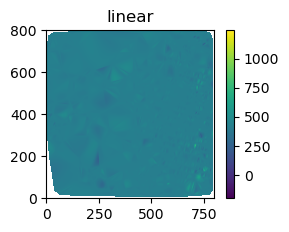

In [ ]:
%%time
time_series_d = []
version_str = 'B11100Ar'
file = ''
latitude_max = 40.0
latitude_min = 0.0
longitude_max = 60.0
longitude_min = 20.0
alldates= np.unique(arr2[:]['date'])
print(len(alldates))
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
for j in range(0,len(alldates)-1,30):
  print(j)
  arr3=[]
  for i in range(j,j+30,1):
   arr3.extend(arr2[arr2[:]['date'] == np.datetime64( (alldates[i]))])
  print(len(arr3))
  # Read the data from your variables
  latitude = np.array([row['Lat'] for row in arr3]) # Extract 'Lat' values into a numpy array
  longitude = np.array([row['Long'] for row in arr3]) # Extract 'Long' values into a numpy array
  x_meas = np.array([row['XCO2'] for row in arr3]) # Extract 'XCO2' values into a numpy array
  qf = np.array([row['Qual'] for row in arr3]) # Extract 'Qual' values into a numpy array
  print(latitude)
  print(longitude)
  print(x_meas)
  print(qf)
  # Filter the data for latitude and longitude
  # Determine the subset selection by latitude and longitude bounding box and quality flag (0 = good)
  selection_only = np.where(
      (latitude > latitude_min) & (latitude < latitude_max) &
      (longitude > longitude_min) &(longitude < longitude_max) & (qf == 0)
  )[0]

  # Apply the subset selection to data variables
  latitude = latitude[selection_only]
  longitude = longitude[selection_only]
  x_meas = x_meas[selection_only]
  pixel_size_deg =0.05 # 5x5 degree grid resolution

  # Get the grid for the interpolated values
  grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]

  # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
  grid_x = griddata((latitude, longitude), x_meas, (grid_lat, grid_lon), method='cubic', rescale=True)#, fill_value=0, rescale=True)
  print(latitude)
  plt.subplot(221)
  plt.imshow(grid_x.T, origin='lower')
  plt.colorbar()
  plt.title('linear')
  time_series_d.append(grid_x)
time_series_d= np.array(time_series_d)
print(time_series_d.shape)
x_meas_month_mean_aa = np.mean(time_series_d, axis=0)
print(x_meas_month_mean_aa.shape)

In [ ]:
creating shape files

In [ ]:
# convert to shape file of points
import pandas as pd
import glob,os
import geopandas as gpd
import matplotlib.pyplot as plt
from functools import partial
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata
newpath = './shapefiles'
alldates= np.unique(arr2[:]['date'])
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'
if not os.path.exists(newpath):
    os.makedirs(newpath)
for i in range(2):#len(alldates)):
    filename = 'shapefile_'+ str(dateme[i]) + ".shp"
    arr3=arr2[arr2[:]['date'] == np.datetime64( (alldates[i]))]
    arr4 = pd.DataFrame() # Create arr4 as an empty DataFrame
    arr4['XCO2']=arr3[:]['XCO2']
    arr4['Long']=arr3[:]['Long']
    arr4['Lat']=arr3[:]['Lat']
    print(arr4)
    prt2= newpath + "/" + filename
    data_gdf = gpd.GeoDataFrame(arr4, geometry = gpd.points_from_xy(arr4['Long'], arr4['Lat']),crs=ESRI_WKT)
    geo_grid_cubic = make_geocube(
        data_gdf,
        measurements=['XCO2'],
        resolution=(-1, 1),
        rasterize_function=partial(rasterize_points_griddata, method="cubic"),
        interpolate_na_method="nearest",
    )
    geo_grid_cubic.XCO2.plot.imshow()
    #data_gdf.crs = {'epsg:4326'}
    #data_gdf.to_file(filename= prt2, driver = 'ESRI Shapefile')
    #data_gdf.plot()

In [ ]:
#Reeading oco2 files

In [ ]:
grid on basemap creator

In [ ]:
print(longitude.shape)
print(latitude.shape)

(318947,)
(318947,)


(1801, 3601)
421.8790322580645   412.3225806451613


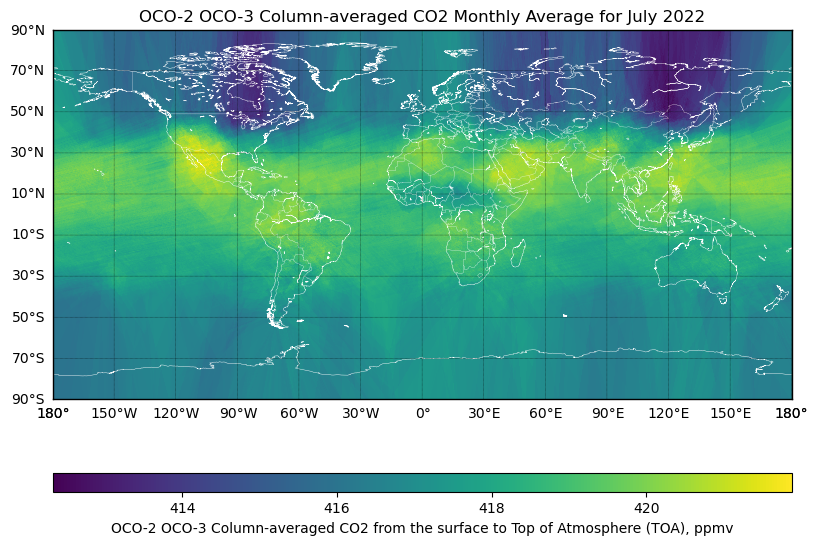

In [ ]:
# Calculate width and height
latitude_max = 90
latitude_min = -90.0
longitude_max = 180
longitude_min =-180.0
from datetime import datetime
aspect_ratio = (longitude_max - longitude_min) / (latitude_max - latitude_min)
w = 3600; h = w / aspect_ratio
current_date = datetime.strptime("July-2023", "%B-%Y")
# Specify figure size (in inches)
dpi = 300;
plt.figure(figsize=(w / dpi, h / dpi))
print(x_meas_month_mean_a.shape)
# Create a basemap instance
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=latitude_min, urcrnrlat=latitude_max,  # set latitude limits as previously defined
            llcrnrlon=longitude_min, urcrnrlon=longitude_max)  # set longitude limits as previously defined

m.drawmapboundary(fill_color='black')
m.drawcoastlines(linewidth=0.3, color='white')
m.drawcountries(linewidth=0.2, color='white')

# Draw parallels (latitude lines) and meridians (longitude lines)
parallels = np.arange(latitude_min, latitude_max+1, 20.)
m.drawparallels(parallels, labels=[True,False,False,False], linewidth=0.3)

meridians = np.arange(longitude_min, longitude_max+1, 30.)
m.drawmeridians(meridians, labels=[False,False,False,True], linewidth=0.3)

pixel_size_deg =0.1 # 5 degree resolution

# Get the grid for the interpolated values
grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]
mask =x_meas_month_mean_a > 0
vmax1=np.max(x_meas_month_mean_a[mask] )  # Apply the mask to the slice
vmin1= np.min(x_meas_month_mean_a[mask])  # Apply the mask to the slice
'''vmax1=np.max(x_meas_month_mean_a)
vmin1= np.min(x_meas_month_mean_a)'''
print(vmax1," ",vmin1)
# Plot the interpolated data using pcolormesh instead of scatter
m.drawlsmask(land_color='white', ocean_color='black', lakes=True)
sc = m.pcolormesh(grid_lon, grid_lat, x_meas_month_mean_a[:-1,:-1], latlon=True)#, cmap='jet', alpha=0.9, vmin=vmin1, vmax=vmax1, shading='auto')
#m.scatter(longitude,latitude,c =x_meas,s = 5,cmap = 'Greys')
# Add a colorbar
cbar = m.colorbar(sc, location='bottom', pad="20%")
cbar.set_label('OCO-2 OCO-3 Column-averaged CO2 from the surface to Top of Atmosphere (TOA), ppmv')

# set plot title
title_date = current_date #.strftime("%b-%Y")
plt.title(f'OCO-2 OCO-3 Column-averaged CO2 Monthly Average for July 2022')
#\nMin: {title_min:.01f}, Max: {title_max:.01f} ppmv')

# Save figure to PNG file
plt.savefig(f'./oco2_oco3_co2_month_average_july_2022_qf.png', dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()

In [ ]:
Modified grid on basemap creator

In [ ]:
print(len(time_series_b))

(31, 1041, 3601)
430.25
407.0
(1041, 3601)
(1041, 3601)


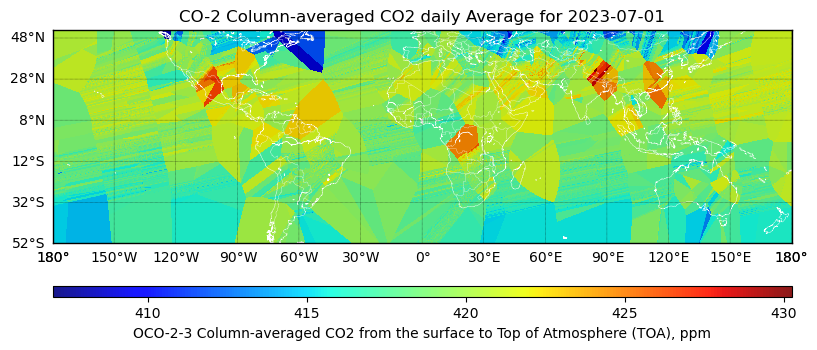

428.5
404.25
(1041, 3601)
(1041, 3601)


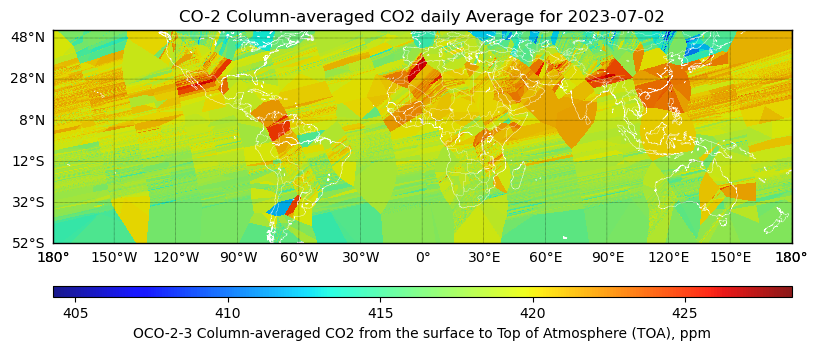

428.75
408.25
(1041, 3601)
(1041, 3601)


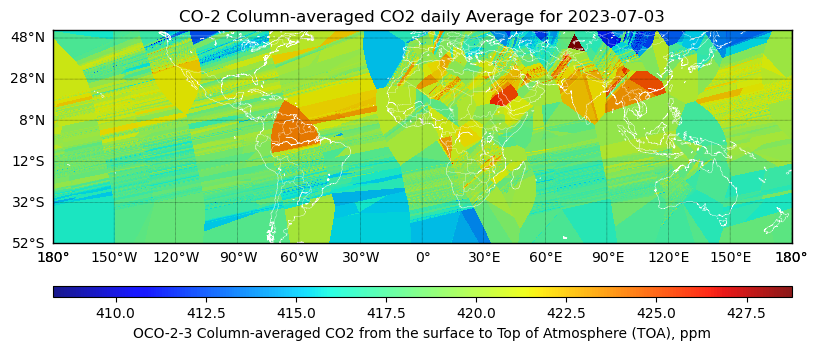

430.0
404.25
(1041, 3601)
(1041, 3601)


KeyboardInterrupt: 

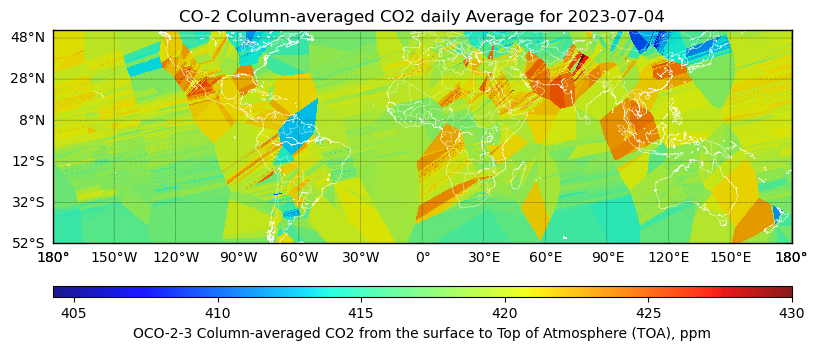

In [ ]:
# Calculate width and height
#print(time_series_a.shape[0],time_series_b.shape[0])
#time_series_c= np.zeros((time_series_a.shape[0],2*time_series_a.shape[1],time_series_a.shape[2]))
print(time_series_b.shape)
#time_series_c= np.concatenate((time_series_a, time_series_b),axis=0
for i in range (len(time_series_b)):
  aspect_ratio = (longitude_max - longitude_min) / (latitude_max - latitude_min)
  w = 3600; h = w / aspect_ratio
  dpi = 300;
  plt.figure(figsize=(w / dpi, h / dpi))
#  time_series_c[i]= np.concatenate((time_series_a[i], time_series_b[i]),axis=0)
#print(time_series_b.shape)
# Specify figure size (in inches)

# Create a basemap instance
  m = Basemap(projection='cyl', resolution='l',
              llcrnrlat=latitude_min, urcrnrlat=latitude_max,  # set latitude limits as previously defined
              llcrnrlon=longitude_min, urcrnrlon=longitude_max)  # set longitude limits as previously defined

  m.drawmapboundary(fill_color='black')
  m.drawcoastlines(linewidth=0.3, color='white')
  m.drawcountries(linewidth=0.2, color='white')

  # Draw parallels (latitude lines) and meridians (longitude lines)
  parallels = np.arange(latitude_min, latitude_max+1, 20.)
  m.drawparallels(parallels, labels=[True,False,False,False], linewidth=0.3)

  meridians = np.arange(longitude_min, longitude_max+1, 30.)
  m.drawmeridians(meridians, labels=[False,False,False,True], linewidth=0.3)
  mask = time_series_b[i,:,:] > 0
  vmax1=np.max(time_series_b[i,:,:][mask] )  # Apply the mask to the slice
  vmin1= np.min(time_series_b[i,:,:][mask])  # Apply the mask to the slice
  print(vmax1)
  print(vmin1)
  pixel_size_deg = 0.1 # 5 degree resolution
  # Get the grid for the interpolated values
  grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]
  #grid_lat, grid_lon = np.mgrid[latmin1:latmax1+pixel_size_deg:pixel_size_deg, lonmin1:lonmax1+pixel_size_deg:pixel_size_deg]
  # Plot the interpolated data using pcolormesh
  #vmin=vmin1, vmax=vmax1
  print(grid_lat.shape)
  print(grid_lon.shape)
  sc = m.pcolormesh(grid_lon, grid_lat, time_series_b[i,:-1,:-1], latlon=True, cmap='jet', alpha=0.9,vmin=vmin1, vmax=vmax1, shading='flat')
  # Plot the interpolated data using pcolormesh instead of scatte
  # Plot the interpolated data using pcolormesh instead of scatter
  #sc = m.pcolormesh(array5[:10000,0], array5[:10000,1], xco2_data, latlon=True, cmap='jet', alpha=0.9, vmin=372.83417, vmax=432.0988, shading='flat') # Use 'flat' shading
  #sc = m.pcolormesh(grid_lat, grid_lon, arr2['XCO2'][:-1].reshape(18,278011), latlon=True, cmap='jet', alpha=0.9, vmin=372.83417, vmax=432.0988, shading='auto')

  # Add a colorbar
  cbar = m.colorbar(sc, location='bottom', pad="20%")
  cbar.set_label('OCO-2-3 Column-averaged CO2 from the surface to Top of Atmosphere (TOA), ppm')

  # set plot title
  '''n= i*3
  from_date = alldates[n]
  to_date = alldates[n+2]'''
  current_date= alldates[i]
  #title_date = current_date.strftime("%b-%Y")
  plt.title(f'CO-2 Column-averaged CO2 daily Average'+' for '+ str(current_date))
  #plt.title(f'CO-2 Column-averaged CO2 3 days '+' from '+ str(from_date) + " to " + str(to_date))
  #plt.title(f'CO-2 Column-averaged CO2 5 days Average
  #\nMin: {title_min:.01f}, Max: {title_max:.01f} ppmv')

  # Save figure to PNG file
  plt.savefig(f"./data_image_simulation13/"+ str(current_date)+'.png', dpi=dpi, bbox_inches='tight')
  #plt.savefig(f"./data_image_simulation13/"+  str(from_date) + "_to_" + str(to_date)+'.png', dpi=dpi, bbox_inches='tight')
  plt.show()
  plt.close()

In [ ]:
#%pip install moviepy
import os
import glob
from natsort import natsorted
from moviepy.editor import *

base_dir = os.path.realpath("./data_image_rbfjuly2023")
print(base_dir)

gif_name = 'pic'
fps = 1

file_list = glob.glob('./data_image_rbfjuly2023/*.png')  # Get all the pngs in the current directory
file_list_sorted = natsorted(file_list,reverse=False)  # Sort the images

clips = [ImageClip(m).set_duration(1)
         for m in file_list_sorted]
concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("july2023.mp4", fps=fps)

In [ ]:
#reading mask data
import rasterio
import numpy as np

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)
        profile = src.profile
    return data, profile

# Read the ESRI grid data (mask)
mask_data, mask_profile = read_raster("C:/Users/Dr. Mohamad Awad/Documents/OCO-2/worldmask")

# Create a binary mask (example: keeping values greater than a threshold)


# Apply the mask to the target raster
masked_target_data = np.where(mask_data, x_meas_month_mean_a, np.nan)

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Load the shapefile
shapefile = gpd.read_file('C:/Users/Dr. Mohamad Awad/Documents/OCO-2/worldcountriesGC.shp')

# Define the resolution and create a raster template
resolution = 0.1  # Define your resolution
bounds = shapefile.total_bounds
transform = rasterio.transform.from_bounds(bounds[0], bounds[1], bounds[2], bounds[3],
                                           int((bounds[2] - bounds[0]) / resolution),
                                           int((bounds[3] - bounds[1]) / resolution))

# Rasterize the shapefile based on a specific field
field_name = 'flag'  # Replace with your field name
shapes = ((geom, value) for geom, value in zip(shapefile.geometry, shapefile[field_name]))
out_shape = (int((bounds[3] - bounds[1]) / resolution), int((bounds[2] - bounds[0]) / resolution))
raster = rasterize(
    shapes,
    out_shape=out_shape,
    transform=transform,
    fill=0,
    dtype='uint8'
)

# Create the mask
mask = np.where(raster > 0, 1, np.nan)
#masked_target_data = np.where(mask, x_meas_month_mean_a, np.nan)
# Save the mask to a new file
'''with rasterio.open('C:/Users/Dr. Mohamad Awad/Documents/OCO-2/worldcountriesasmask.tif', 'w', driver='GTiff',
                   height=out_shape[0], width=out_shape[1], count=1, dtype='uint8',
                   crs=shapefile.crs, transform=transform) as dst:
    dst.write(mask.astype('uint8'), 1)'''

"with rasterio.open('C:/Users/Dr. Mohamad Awad/Documents/OCO-2/worldcountriesasmask.tif', 'w', driver='GTiff',\n                   height=out_shape[0], width=out_shape[1], count=1, dtype='uint8',\n                   crs=shapefile.crs, transform=transform) as dst:\n    dst.write(mask.astype('uint8'), 1)"

In [ ]:
# to transform mask to target raster both have the same size

Mask shape: (1726, 3599)
Target shape: (1801, 3601)
Masked target shape: (1726, 3599)


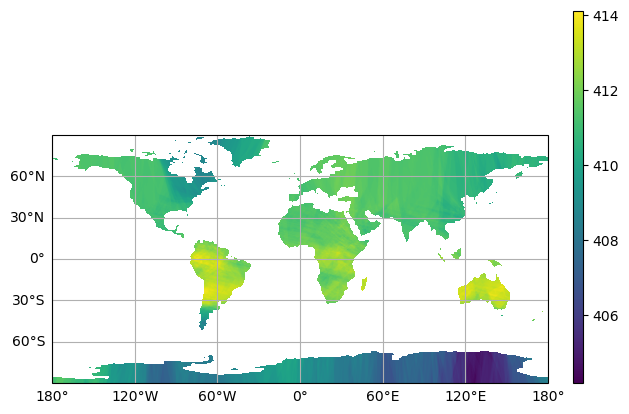

In [ ]:
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
# Check dimensions
mask_shape = mask.shape
target_shape = x_meas_month_mean_a.shape #x_meas_month_mean_a.shape

# Crop or resize the mask array to match the target array dimensions
if mask_shape != target_shape:
    # Crop the mask array to match the target array dimensions
    mask_cropped = mask[:target_shape[0], :target_shape[1]]
else:
    print("no change")
    mask_cropped = mask
print("Mask shape:", mask_cropped.shape)
print("Target shape:", target_shape)
# Apply the mask to the target array
masked_x_meas_month_mean_a = np.where(mask_cropped == 1, x_meas_month_mean_a[:mask.shape[0],:mask.shape[1]], np.nan)

# Print the shapes to verify

print("Masked target shape:", masked_x_meas_month_mean_a.shape)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
cax = ax.imshow(masked_x_meas_month_mean_a, extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree(), cmap='viridis')

# Add latitude and longitude gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines for reference
#ax.coastlines()
axins = inset_axes(ax,
                   width="2%",  # width of the colorbar as a percentage of the parent axes width
                   height="150%",  # height of the colorbar as a percentage of the parent axes height
                   loc='lower left',  # location of the inset axes
                   bbox_to_anchor=(1.05, 0., 1, 1),  # position relative to the parent axes
                   bbox_transform=ax.transAxes,
                   borderpad=0)

# Add the colorbar to the inset axes
fig.colorbar(cax, cax=axins, orientation='vertical')

plt.show()

C:\Users\anaconda3\envs\newee\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


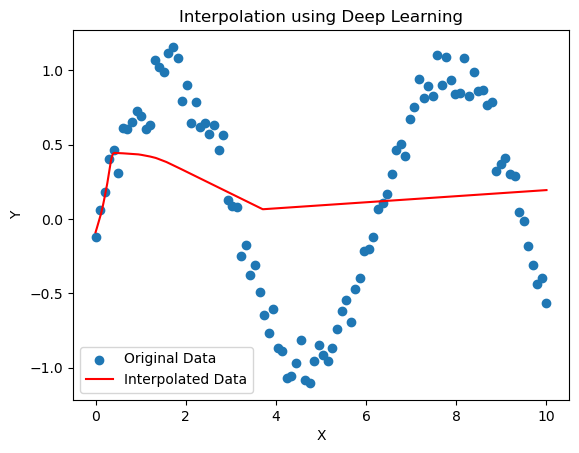

In [ ]:
# to predict using deep learning
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)  # Adding some noise

# Define the model
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x, y, epochs=100, verbose=0)

# Generate new data points for interpolation
x_new = np.linspace(0, 10, 1000)
y_new = model.predict(x_new)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, color='red', label='Interpolated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolation using Deep Learning')
plt.legend()
plt.show()

In [ ]:
%%time
import pandas as pd
import pandas as pd1
time_series_b = []
version_str = 'B11100Ar'
file = ''
x_meas1 = []
latitude_max = 90
latitude_min = -90.0
longitude_max = 180
longitude_min =-180.0
alldates= np.unique(arr2[:]['date'])
#file_path = "G:/My Drive/OCO2-OCO3/output/co2july2023all3.nc"  # created by
#dataset = nc.Dataset(file_path, 'r')
#data = dataset.variables['xco2'][:]  # Replace 'data_variable' with the actual variable name
#dataset.close()
df_list = []
'''for j in range(0,len(alldates)-1,30):
  arr3=arr2[arr2[:]['date'] == np.datetime64( (alldates[j]))]
  # Read the data from your variables
  time = arr3[:]['time']
  latitude = arr3[:]['Lat']
  longitude =arr3[:]['Long']
  x_meas = arr3[:]['XCO2']
  qf = arr3[:]['Qual']'''
P=1
for j in range(0,len(alldates),P):
  arr3=[]
  for i in range(j,j+P,1):
   #print("I am here near arr3",i)
   arr3.extend(arr2[arr2[:]['date'] == np.datetime64( (alldates[i]))])
  #print(len(arr3))
  # Read the data from your variables
  latitude = np.array([row['Lat'] for row in arr3]) # Extract 'Lat' values into a numpy array
  longitude = np.array([row['Long'] for row in arr3]) # Extract 'Long' values into a numpy array
  x_meas = np.array([row['XCO2'] for row in arr3]) # Extra
  date= np.array([row['date'] for row in arr3]) # Extract 'date' values into a numpy array
  time = np.array([row['time'] for row in arr3]) # Extract 'time' values into a numpy array
  qf = np.array([row['Qual'] for row in arr3]) # Extract 'Qual' values into a numpy array
  # Apply the subset selection
  selection_only = np.where(
      (latitude > latitude_min) & (latitude < latitude_max) &
      (longitude > longitude_min) &(longitude < longitude_max) & (qf == 0)
  )[0]
  '''print("len of latitude",len(latitude))
  print("len of longitude",len(longitude))
  print("len of x_meas",len(x_meas))
  print("len of selection_only",len(selection_only))'''
  # Apply the subset selection to data variables
  df1 = pd.DataFrame(time[selection_only], columns=['datetime_column'])
  # Extract the time
  df1['date_only'] = df1['datetime_column'].dt.date
  df1['time_only'] = df1['datetime_column'].dt.time
  #print(df1['date_only'])
  df1['seconds'] = pd.to_timedelta(df1['time_only'].astype(str)).dt.total_seconds()
  print(np.sum(df1['seconds']))
  points= np.zeros((len(selection_only),4)).astype(np.float32)
  points[:,0] = date[selection_only]
  points[:,2] = latitude[selection_only]
  points[:,1] = longitude[selection_only]
  points[:,3] = x_meas[selection_only]
  #print(points.shape)
  print(points[:,0],points[:,1])
 #regress_DL(points[:,0:4],points[:,4])
  pixel_size_deg =1 # 5x5 degree grid resolution
  # Get the grid for the interpolated values
  grid_lat, grid_lon = np.mgrid[latitude_min:latitude_max+pixel_size_deg:pixel_size_deg, longitude_min:longitude_max+pixel_size_deg:pixel_size_deg]
  # Bin the data on a consistent lat/lon grid using griddata using nearest neighbor binning; for bi-linear, use method='linear'
  grid_x = griddata((points[:,2], points[:,1]), points[:,3], (grid_lat, grid_lon), method='linear', fill_value=0, rescale=True)
  #print(len(data[j,:,:]))
  '''mask = data[j,:,:] > 200
  vmax1=np.max(data[j,:,:][mask] )  # Apply the mask to the slice
  vmin1= np.min(data[j,:,:][mask])
  avrg = (vmax1+vmin1)/2
  print("vmax, vmin, average", vmax1, vmin1, avrg)
  data[j, data[j]< 200] = avrg'''
  #pointIntgrid(points,data[j,:,:],pixel_size_deg)#data[j,:,:],pixel_size_deg)
  #print(grid_x.shape)
  #print(np.count_nonzero(np.isnan(grid_x)))
  '''if np.count_nonzero(np.isnan(grid_x)) >0:
    #print("iam her")
    #print(grid_x)
    #df = pd.DataFrame(grid_x)
    if df.dropna().size >= 3:  # At least 3 points needed for order=2
      df.interpolate(method='polynomial', order=2, inplace=True) # Interpolate if enough data
    else:
      df.interpolate(method='linear', inplace=True) # Fallback to linear interpolation
    #df.interpolate(method='polynomial', order=2, inplace=True)
    #df.interpolate(method='linear', inplace=True)
    #grid_x1 = df.to_numpy()
   #print("after interpolate")
    #if(np.count_nonzero(np.isnan(grid_x1))< np.count_nonzero(np.isnan(grid_x))):
     #print("iam here")
    #print(np.count_nonzero(np.isnan(grid_x1)))
    #time_series_b.append(grid_x1)
  else:'''
  '''pd_dict = {}
  pd_dict['time']=points[:,0]
  pd_dict['longitude']=points[:,1]
  pd_dict['latitude']=points[:,2]
  pd_dict['xco2']=points[:,3]
  pd1 = pd.DataFrame(pd_dict)
  regress_DL2(pd1)'''
  # Create a list of dataframes

  df = pd.DataFrame({
      'date': df1['date_only'],# points[:,0],
      'time': df1['time_only'],
      'latitude': points[:,2],
      'longitude': points[:,1],
      'xco2': points[:,3]
  })
  print(df.head())
  df_list.append(df)

  time_series_b.append(grid_x)
print(len(df_list))
time_series_b = np.array(time_series_b)
print(time_series_b.shape)
'''lat = np.linspace(50, 50, grid_x.shape[0])  # 2D latitude array
lon = np.linspace(-180, 180, grid_x.shape[1])  # 2D longitude array
time = np.arange(0, 31)  # 1D time array (e.g., days of the july month)
print(time.shape)
filename="co2july2023_31.nc"
create_netcdf1(time,lat,lon, time_series_b[0,:,:], filename)
# Create a mask: 1 for valid data, 0 for missing data
mask = ~np.isnan(time_series_b[0,:,:])
filename2 = "maskfile_0.nc"
create_netcdf(time,lat,lon,mask, filename2)
print(mask.shape)'''
x_meas_month_mean_a = np.mean(time_series_b, axis=0)
#regress_DL2(df_list)


5745835769.499999
[19539. 19539. 19539. ... 19539. 19539. 19539.] [-165.45332 -165.44719 -165.46017 ...  177.7079   177.72151  177.78894]
         date             time   latitude   longitude        xco2
0  2023-07-01  00:00:18.300000  42.544163 -165.453323  419.542603
1  2023-07-01  00:00:18.300000  42.534615 -165.447189  421.035156
2  2023-07-01  00:00:18.700000  42.562492 -165.460175  421.161743
3  2023-07-01  00:00:18.700000  42.552952 -165.454025  420.311493
4  2023-07-01  00:00:18.700000  42.543453 -165.448044  420.859772
6809505064.700001
[19540. 19540. 19540. ... 19540. 19540. 19540.] [-157.10796  -157.12009  -157.07982  ...  104.37056   104.384476
  104.37991 ]
         date             time   latitude   longitude        xco2
0  2023-07-02  00:19:22.300000 -37.589172 -157.107956  415.286041
1  2023-07-02  00:19:23.300000 -37.535767 -157.120087  414.746887
2  2023-07-02         00:19:24 -37.513050 -157.079819  415.025818
3  2023-07-02         00:19:24 -37.473125 -157.226334  41

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv3D

# Load your dataset
# Assuming your dataset is in a CSV file with columns: 'time', 'longitude', 'latitude', 'sst'
#data = pd.read_csv('your_dataset.csv')

# Preprocess the data
# Fill missing values with the mean of the column
#data.fillna(data.mean(), inplace=True)
def regress_DL(X,y):
# Separate features and target
#X = data[['time', 'longitude', 'latitude']]
#y = data['sst']

# Split the data into training and testing sets
  print(len(X))
  df = pd.DataFrame(X, columns=['time', 'longitude', 'latitude'])

  # Convert the 'time' column from Unix timestamp to datetime format
  df['time'] = pd.to_datetime(df['time'])
  year_start = pd.to_datetime(df['time'].dt.year.astype(str) + '-01-01')

# Calculate the difference in days with fraction of hours since the beginning of the provided year
  df['days_since_year_start'] = (df['time'] - year_start).dt.total_seconds() / 86400

# Print the DataFrame
  print(df.columns)
# Convert datetime64[ns] to seconds since epoch
  #df['time_in_seconds'] = df['time'].astype(np.int64) / 10**9
# Split the data into training and testing sets
  df = df.drop(columns=['time'])
  print(df.columns)
  #pivot_df = df.pivot_table(index='days_since_year_start', columns=['latitude', 'longitude'], values='xco2')
  '''co2_data = pivot_df.values
  samples = 34  # Number of samples
  time_steps = 710  # Number of time steps
  latitude = 34  # Number of latitude points
  longitude = 710  # Number of longitude points
  channels = 1  # Single channel for SST

# Reshape the data
  #co2_data_4d = co2_data.reshape((samples,  latitude, longitude, channels))
  co2_data_4d[:co2_data.shape[0], :co2_data.shape[2], :co2_data.shape[2], :
# Check the shape of the reshaped data
  print("Shape after reshaping:", co2_data_4d.shape)'''
  X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=30)

  # Standardize the features
  scaler = StandardScaler()
  X_train1 = scaler.fit_transform(X_train)
  X_test1 = scaler.transform(X_test)

  # Build the MLP model
  model = Sequential()
  model.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')
  # Define the model

  # Train the model
  model.fit(X_train1, y_train, epochs=10, batch_size=16, validation_split=0.2)


  # Predict missing values
  predictions = model.predict(X_test1)
  print(predictions)
  # Evaluate the model
  loss = model.evaluate(X_test1, y_test)
  print(f'Model Loss: {loss}')
  plot_data=pd.DataFrame(X_test, columns=['days_since_year_start', 'longitude', 'latitude'])
  plot_data['predicted'] = predictions
  plot_data['original'] = y_test
  print(plot_data)
  # Create a 3D scatter plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  sc = ax.scatter(plot_data['days_since_year_start'], plot_data['longitude'], plot_data['latitude'], c=plot_data['predicted'], cmap='viridis')

  # Add color bar
  cbar = plt.colorbar(sc)
  cbar.set_label('Predicted CO2 ppm')

  # Set labels
  ax.set_xlabel('Time')
  ax.set_ylabel('Latitude')
  ax.set_zlabel('Longitude')

  # Show plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  sc_measured = ax.scatter(plot_data['days_since_year_start'], plot_data['longitude'], plot_data['latitude'], c=plot_data['original'], cmap='viridis', label='Measured CO2')

  # Add color bar for measured SST
  cbar_measured = plt.colorbar(sc_measured)
  cbar_measured.set_label('Measured CO2')

  # Set labels for measured SST plot
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  ax.set_zlabel('Time (days since year start)')
  ax.set_title('Measured CO2')
  plt.show()
  r2 = r2_score(y_test, predictions)
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, predictions, alpha=0.5)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  plt.xlabel('Measured co2')
  plt.ylabel('Predicted co2')
  plt.title(f'Predicted vs Measured Co2\nR-squared: {r2:.2f}')
  plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv3D
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
# Assuming your dataset is in a CSV file with columns: 'time', 'longitude', 'latitude', 'sst'
#data = pd.read_csv('your_dataset.csv')

# Preprocess the data
# Fill missing values with the mean of the column
#data.fillna(data.mean(), inplace=True)
def regress_DL2(df):
  scaler = MinMaxScaler()
  df[['time', 'longitude', 'latitude', 'xco2']] = scaler.fit_transform(df[['time', 'longitude', 'latitude', 'xco2']])
  def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

  seq_length = 30
  X, y = create_sequences(df[['time', 'longitude', 'latitude', 'xco2']].values, seq_length)
  split = int(0.8 * len(X))
  X_train, X_test = X[:split], X[split:]
  y_train, y_test = y[:split], y[split:]
  print(y_train)
  print(y_test)
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 4)))
  model.add(LSTM(50))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
  loss = model.evaluate(X_test, y_test)
  predictions = model.predict(X_test)

# Assuming labels are in a separate column

  X_test_2d = X_test.reshape(X_test.shape[0], -1)  # Flatten the last two dimensions

  plot_data = pd.DataFrame(X_test_2d, columns=['days_since_year_start', 'longitude', 'latitude', 'other_feature'])  # Adjust column names if necessary

  # Proceed with the rest of your code
  plot_data['predicted'] = predictions
  plot_data['original'] = y_test
  print(plot_data)
  # Create a 3D scatter plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  sc = ax.scatter(plot_data['days_since_year_start'], plot_data['longitude'], plot_data['latitude'], c=plot_data['predicted'], cmap='viridis')

  # Add color bar
  cbar = plt.colorbar(sc)
  cbar.set_label('Predicted CO2 ppm')

  # Set labels
  ax.set_xlabel('Time')
  ax.set_ylabel('Latitude')
  ax.set_zlabel('Longitude')

  # Show plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  sc_measured = ax.scatter(plot_data['days_since_year_start'], plot_data['longitude'], plot_data['latitude'], c=plot_data['original'], cmap='viridis', label='Measured CO2')

  # Add color bar for measured SST
  cbar_measured = plt.colorbar(sc_measured)
  cbar_measured.set_label('Measured CO2')

  # Set labels for measured SST plot
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  ax.set_zlabel('Time (days since year start)')
  ax.set_title('Measured CO2')
  plt.show()
  r2 = r2_score(y_test, predictions)
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, predictions, alpha=0.5)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  plt.xlabel('Measured co2')
  plt.ylabel('Predicted co2')
  plt.title(f'Predicted vs Measured Co2\nR-squared: {r2:.2f}')
  plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
df_combined = pd.concat(df_list, ignore_index=True)
df_combined.reset_index(drop=True, inplace=True)
df_combined['date'] = pd.to_datetime(df_combined['date']).astype('int64') / 10**9
df_combined['time'] =  pd.to_timedelta(df_combined['time'].astype(str)).dt.total_seconds()/ 3600 #pd.to_datetime(df_combined['time']).dt.hour
print(df_combined.head())
X = df_combined[['date','time', 'longitude', 'latitude']]
y = df_combined['xco2']
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
# Print the model summary
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='min', baseline=0.1)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2,callbacks=[early_stopping])
#model.fit(X, y, epochs=20, batch_size=32)
loss = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
y_pred = model.predict(X_test)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f'R-squared: {r2}')
# Inverse transform the scaled data
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual CO2')
plt.plot(y_pred_inv, label='Predicted CO2')
plt.title('Actual vs Predicted CO2')
plt.xlabel('Sample Number')
plt.ylabel('Carbon dioxide concentration in the atmosphere (CO2)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Assuming dataframes are combined into a single DataFrame 'df'
# df = pd.concat(list_of_dataframes)
df_combined = pd.concat(df_list, ignore_index=True)
df_combined['date'] = pd.to_datetime(df_combined['date'])
#df_combined['date'] = pd.to_datetime(df_combined['date'])
#print(df_combined.head())
# Reference point (start of the year)
df_combined['start_of_year'] = pd.to_datetime(df_combined['date'].dt.year.astype(str) + '-01-01')

# Calculate total hours from the start of the year
df_combined['hours_from_start_of_year'] = (df_combined['date'] - df_combined['start_of_year']).dt.total_seconds() / 3600

#print(df_combined[['date', 'hours_from_start_of_year']])

df_combined['time_only_hours'] =  pd.to_timedelta(df_combined['time'].astype(str)).dt.total_seconds()/ 3600 # Normalize features
df_combined['hours_lapsed'] = df_combined['hours_from_start_of_year'] + df_combined['time_only_hours']
#print(df_combined.head())
scaler = MinMaxScaler()
#df_combined[[ 'xco2']] = scaler.fit_transform(df_combined[[ 'xco2']])
# Prepare input and output
X = df_combined[['hours_lapsed', 'longitude', 'latitude']].values
y = df_combined['xco2'].values
# Reshape input for CNN+LSTM [samples, timesteps, features]
print(X[:5])
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
#X = X.reshape((X.shape[0], 1, X.shape[1]))
#print(X.shape)
print("scaled")
print(X_scaled[:5] )
#print(me)
print(y_scaled)
# Split data into training and testing sets
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#print(X_train)
#print(pd('star'))
# Build CNN+LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')
model.compile(optimizer=SGD(learning_rate=0.01),loss='mse')#, metrics=['accuracy'])#loss=BinaryCrossentropy(), metrics=['accuracy'])
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='min', baseline=0.1)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2,callbacks=[early_stopping])
# Train model
#model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Predict
loss = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
y_pred = model.predict(X_test)
# Inverse transform the scaled data
print(y_test)
print(y_pred)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
correlation, _ = pearsonr(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Correlation Coefficient: {correlation}')
print(f'R-squared: {r2}')

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:10000], label='Actual CO2')
plt.plot(y_pred_inv[:10000], label='Predicted CO2')
plt.title('Actual vs Predicted CO2')
plt.xlabel('Sample Number')
plt.ylabel('Carbon dioxide concentration in the atmosphere (CO2)')
plt.legend()
# Display metrics on the plot
plt.text(0.01, 0.99, f'MAE: {mae:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
plt.text(0.01, 0.97, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
plt.text(0.01, 0.95, f'Correlation: {correlation:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
plt.text(0.01, 0.93, f'R-squared: {r2:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
plt.show()

[[4344.00508333 -165.45332336   42.54416275]
 [4344.00508333 -165.44718933   42.53461456]
 [4344.00519444 -165.46017456   42.56249237]
 [4344.00519444 -165.45402527   42.55295181]
 [4344.00519444 -165.44804382   42.54345322]]
scaled
[[[0.00000000e+00 4.04073931e-02 9.10144188e-01]]

 [[0.00000000e+00 4.04244321e-02 9.10052132e-01]]

 [[1.49348947e-07 4.03883620e-02 9.10320909e-01]]

 [[1.49348947e-07 4.04054434e-02 9.10228926e-01]]

 [[1.49348947e-07 4.04220586e-02 9.10137347e-01]]]
[[0.7004795 ]
 [0.73953533]
 [0.7428484 ]
 ...
 [0.67231655]
 [0.66947937]
 [0.6519041 ]]


C:\Users\anaconda3\envs\newee\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
66060/66060 - 75s - 1ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2/20
66060/66060 - 76s - 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/20
66060/66060 - 77s - 1ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/20
66060/66060 - 78s - 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/20
66060/66060 - 73s - 1ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/20
66060/66060 - 73s - 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6: early stopping
33030/33030 - 19s - 587us/step - loss: 0.0011
Test Loss: 0.001059704925864935
33030/33030 ━━━━━━━━━━━━━━━━━━━━ 22s 652us/step
[[0.5604162 ]
 [0.64162636]
 [0.6263666 ]
 ...
 [0.65668774]
 [0.6719694 ]
 [0.69729996]]
[[0.61676073]
 [0.64724004]
 [0.6550402 ]
 ...
 [0.6748999 ]
 [0.6732198 ]
 [0.70472765]]
[[416.34326]
 [417.50806]
 [417.80612]
 ...
 [418.5651 ]
 [418.5009 ]
 [419.70496]]


ValueError: shapes (1056955,1) and (1056955,1) not aligned: 1 (dim 1) != 1056955 (dim 0)

Mean Absolute Error (MAE): 1.1553246974945068
Root Mean Square Error (RMSE): 1.5823618173599243
Correlation Coefficient: 0.36777502969822684
R-squared: 0.12877070536047786


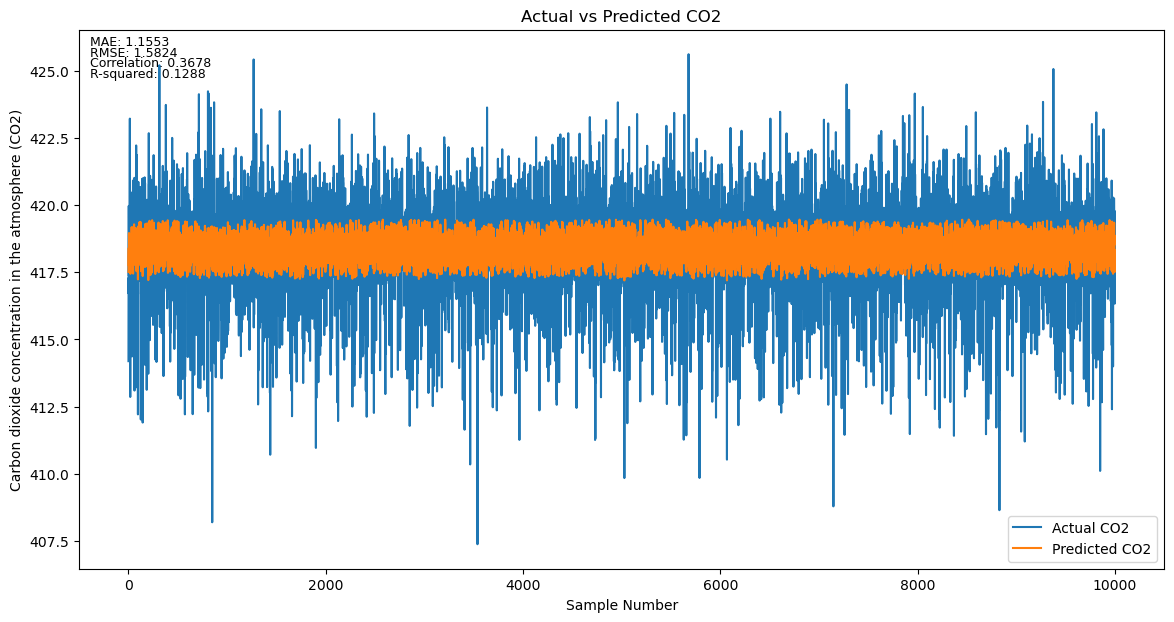

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

# Ensure the arrays are 1-dimensional
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

# Calculate metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
correlation, _ = pearsonr(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Correlation Coefficient: {correlation}')
print(f'R-squared: {r2}')

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:10000], label='Actual CO2')
plt.plot(y_pred_inv[:10000], label='Predicted CO2')
plt.title('Actual vs Predicted CO2')
plt.xlabel('Sample Number')
plt.ylabel('Carbon dioxide concentration in the atmosphere (CO2)')
plt.legend()

# Display metrics on the plot
plt.text(0.01, 0.99, f'MAE: {mae:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
plt.text(0.01, 0.97, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
plt.text(0.01, 0.95, f'Correlation: {correlation:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
plt.text(0.01, 0.93, f'R-squared: {r2:.4f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')

plt.show()
